In [1]:
import nltk
from nltk import FreqDist
#nltk.download('stopwords') # run this one time

In [2]:
import pandas as pd
pd.set_option("display.max_colwidth", 200)
import numpy as np
import re
import spacy

import gensim
from gensim import corpora
import pyLDAvis
import pyLDAvis.gensim_models
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

D:\Tools\Anaconda\lib\site-packages\sklearn\decomposition\_lda.py:28: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  EPS = np.finfo(np.float).eps


In [3]:
#df = pd.read_json('meta_AMAZON_FASHION.json', lines=True)
review = pd.read_json('Appliances.json', lines=True)

In [4]:
review.head(3)

,overall,vote,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,image
0,5,2,False,"11 27, 2013",A3NHUQ33CFH3VM,1118461304,{'Format:': ' Hardcover'},Greeny,"Not one thing in this book seemed an obvious original thought. However, the clarity with which this author explains how innovation happens is remarkable.\n\nAlan Gregerman discusses the meaning of...",Clear on what leads to innovation,1385510400,NaN
1,5,NaN,False,"11 1, 2013",A3SK6VNBQDNBJE,1118461304,{'Format:': ' Kindle Edition'},Leif C. Ulstrup,I have enjoyed Dr. Alan Gregerman's weekly blog ([...] and two previous books since taking an innovation class with Alan over a decade ago. He opened my eyes to seeing the world in a fresh way an...,"Becoming more innovative by opening yourself to conversations with ""strangers""",1383264000,NaN
2,5,NaN,False,"10 10, 2013",A3SOFHUR27FO3K,1118461304,{'Format:': ' Hardcover'},Harry Gilbert Miller III,"Alan Gregerman believes that innovation comes from viewing problems from different and fresh perspectives. In The Necessity of Strangers, he tells short, simple stories to help free us from curre...",The World from Different Perspectives,1381363200,NaN


In [5]:
review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602777 entries, 0 to 602776
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   overall         602777 non-null  int64 
 1   vote            65262 non-null   object
 2   verified        602777 non-null  bool  
 3   reviewTime      602777 non-null  object
 4   reviewerID      602777 non-null  object
 5   asin            602777 non-null  object
 6   style           137973 non-null  object
 7   reviewerName    602762 non-null  object
 8   reviewText      602453 non-null  object
 9   summary         602649 non-null  object
 10  unixReviewTime  602777 non-null  int64 
 11  image           9258 non-null    object
dtypes: bool(1), int64(2), object(9)
memory usage: 51.2+ MB


In [6]:
review = review.dropna(subset=["reviewText"])

In [7]:
review = review.dropna(subset=["summary"])

In [8]:
review.head(3)

,overall,vote,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,image
0,5,2,False,"11 27, 2013",A3NHUQ33CFH3VM,1118461304,{'Format:': ' Hardcover'},Greeny,"Not one thing in this book seemed an obvious original thought. However, the clarity with which this author explains how innovation happens is remarkable.\n\nAlan Gregerman discusses the meaning of...",Clear on what leads to innovation,1385510400,NaN
1,5,NaN,False,"11 1, 2013",A3SK6VNBQDNBJE,1118461304,{'Format:': ' Kindle Edition'},Leif C. Ulstrup,I have enjoyed Dr. Alan Gregerman's weekly blog ([...] and two previous books since taking an innovation class with Alan over a decade ago. He opened my eyes to seeing the world in a fresh way an...,"Becoming more innovative by opening yourself to conversations with ""strangers""",1383264000,NaN
2,5,NaN,False,"10 10, 2013",A3SOFHUR27FO3K,1118461304,{'Format:': ' Hardcover'},Harry Gilbert Miller III,"Alan Gregerman believes that innovation comes from viewing problems from different and fresh perspectives. In The Necessity of Strangers, he tells short, simple stories to help free us from curre...",The World from Different Perspectives,1381363200,NaN


### Data Preprocessing

In [9]:
def freq_words(x, terms = 30):
    all_words = ' '.join([text for text in x])
    all_words = all_words.split()

    fdist = FreqDist(all_words)
    words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

  # selecting top 20 most frequent words
    d = words_df.nlargest(columns="count", n = terms) 
    plt.figure(figsize=(20,5))
    ax = sns.barplot(data=d, x= "word", y = "count")
    ax.set(ylabel = 'Count')
    plt.show()

D:\Tools\Anaconda\lib\site-packages\seaborn\categorical.py:332: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.asarray(s, dtype=np.float)
D:\Tools\Anaconda\lib\site-packages\seaborn\utils.py:551: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.asarray(values).astype(np.float)


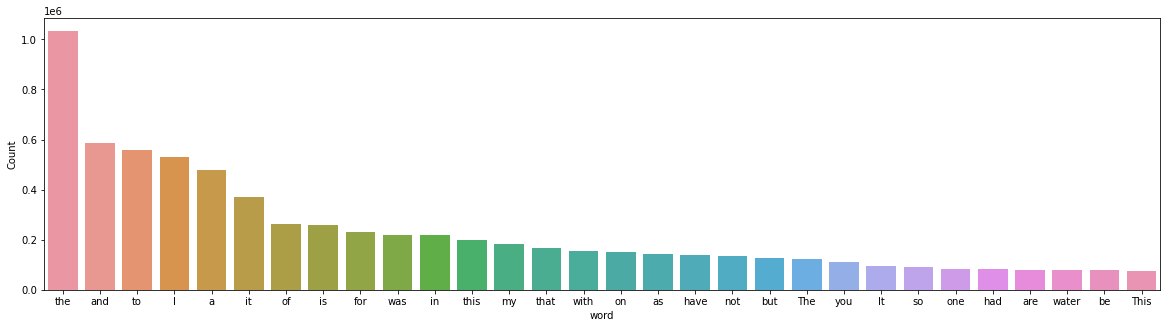

In [10]:
freq_words(review['reviewText'])

In [11]:
df = review['reviewText'].to_frame()
#df[['reviewText']]

In [12]:
#remove stop words as evidenced from previous diagram

In [13]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
#nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to C:\Users\Arthur
[nltk_data]     Wen\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [14]:
stop = set(stopwords.words('english'))

In [15]:
df['noStopword'] = df['reviewText'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

D:\Tools\Anaconda\lib\site-packages\seaborn\categorical.py:332: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.asarray(s, dtype=np.float)
D:\Tools\Anaconda\lib\site-packages\seaborn\utils.py:551: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.asarray(values).astype(np.float)


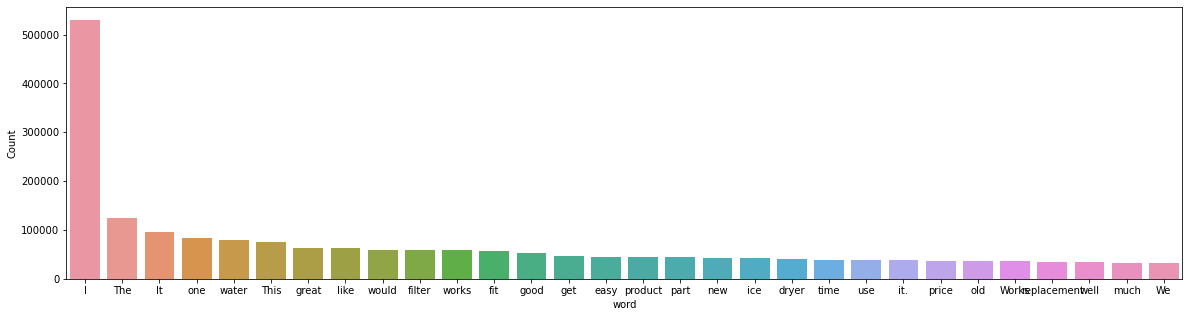

In [16]:
freq_words(df['noStopword'])

In [17]:
df['noStopword'] = df['noStopword'].str.replace("[^a-zA-Z#]", " ")
df['noStopword'] = df['noStopword'].str.lower()

<ipython-input-17-6a3f8751ceac>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['noStopword'] = df['noStopword'].str.replace("[^a-zA-Z#]", " ")


In [18]:
df['tokenized'] = df['noStopword'].apply(nltk.word_tokenize)

In [19]:
df['tagged'] = df['tokenized'].apply(nltk.pos_tag)

In [20]:
df['nouns'] = df['tagged'].apply(lambda x: [word for word, tag in x if tag in ['NN', 'NNS', 'NNP', 'NNPS']])

In [21]:
df['verbs'] = df['tagged'].apply(lambda x: [word for word, tag in x if tag in ['VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ']])

In [22]:
df['adjs'] = df['tagged'].apply(lambda x: [word for word, tag in x if tag.startswith("J")])

In [23]:
df['adverbs'] = df['tagged'].apply(lambda x: [word for word, tag in x if tag.startswith("RB")])

In [24]:
df.head()

,reviewText,noStopword,tokenized,tagged,nouns,verbs,adjs,adverbs
0,"Not one thing in this book seemed an obvious original thought. However, the clarity with which this author explains how innovation happens is remarkable.\n\nAlan Gregerman discusses the meaning of...",not one thing book seemed obvious original thought however clarity author explains innovation happens remarkable alan gregerman discusses meaning human interactions kinds situations tend inspir...,"[not, one, thing, book, seemed, obvious, original, thought, however, clarity, author, explains, innovation, happens, remarkable, alan, gregerman, discusses, meaning, human, interactions, kinds, si...","[(not, RB), (one, CD), (thing, NN), (book, NN), (seemed, VBD), (obvious, JJ), (original, JJ), (thought, VBN), (however, RB), (clarity, NN), (author, NN), (explains, VBZ), (innovation, NN), (happen...","[thing, book, clarity, author, innovation, gregerman, interactions, kinds, situations, inspire, thinking, innovation, things, people, situations, patterns, identifies, ingredients, innovation, peo...","[seemed, thought, explains, happens, discusses, meaning, tend, leads, include, communicate, make, includes, compelled, wouldn, leading, recommend]","[obvious, original, remarkable, alan, human, original, clear, certain, normal, gregerman, interact, t, phenomenon, occur, individual, i, common, apparent]","[not, however, likely, normally, sometimes, sometimes, away]"
1,I have enjoyed Dr. Alan Gregerman's weekly blog ([...] and two previous books since taking an innovation class with Alan over a decade ago. He opened my eyes to seeing the world in a fresh way an...,i enjoyed dr alan gregerman s weekly blog two previous books since taking innovation class alan decade ago he opened eyes seeing world fresh way also taught structured techniques i use in...,"[i, enjoyed, dr, alan, gregerman, s, weekly, blog, two, previous, books, since, taking, innovation, class, alan, decade, ago, he, opened, eyes, seeing, world, fresh, way, also, taught, structured,...","[(i, JJ), (enjoyed, VBD), (dr, NN), (alan, NN), (gregerman, JJ), (s, JJ), (weekly, JJ), (blog, NN), (two, CD), (previous, JJ), (books, NNS), (since, IN), (taking, VBG), (innovation, NN), (class, N...","[dr, alan, blog, books, innovation, class, alan, decade, eyes, world, way, techniques, creative, problem, skills, individuals, difference, invention, innovation, innovation, adaption, inventions, ...","[enjoyed, taking, opened, seeing, taught, i, use, solving, alan, makes, borrowed, cultures, surrounded, builds, delves, making, addressing, challenge, tackling, seeking, alan, borrows, storytellin...","[i, gregerman, s, weekly, previous, fresh, structured, increase, teams, untangles, easier, see, proven, previous, excellent, great, mix, memorable, newest, previous, critical, alternative, full, e...","[also, much, heavily, highly, recently, highly, s]"
2,"Alan Gregerman believes that innovation comes from viewing problems from different and fresh perspectives. In The Necessity of Strangers, he tells short, simple stories to help free us from curre...",alan gregerman believes innovation comes viewing problems different fresh perspectives in the necessity strangers tells short simple stories help free us current legacy views problem hand he ...,"[alan, gregerman, believes, innovation, comes, viewing, problems, different, fresh, perspectives, in, the, necessity, strangers, tells, short, simple, stories, help, free, us, current, legacy, vie...","[(alan, NN), (gregerman, NN), (believes, VBZ), (innovation, NN), (comes, VBZ), (viewing, VBG), (problems, NNS), (different, JJ), (fresh, JJ), (perspectives, NNS), (in, IN), (the, DT), (necessity, ...","[alan, gregerman, innovation, problems, perspectives, necessity, strangers, simple, stories, legacy, views, problem, hand, exercises, collaborate, strangers, problems, necessity, strangers, read, ...","[believes, comes, viewing, tells, help, free, provides, containing, stretch, thinking, find, focuse

In [25]:
df['Token_Count'] = df['tokenized'].str.len()

In [26]:
def norm_lemm_v_a_func(text):
    '''
    Lemmatize tokens from string
    
    Step 1: Use word_tokenize() to get tokens from string
    Step 2: Use WordNetLemmatizer() with POS tag 'v' to lemmatize the created tokens
    Step 3: Use word_tokenize() to get tokens from generated string        
    Step 4: Use WordNetLemmatizer() with POS tag 'a' to lemmatize the created tokens
    
    Args:
        text (str): String to which the functions are to be applied, string
    
    Returns:
        String with lemmatized words
    '''
    words1 = word_tokenize(text)
    text1 = ' '.join([WordNetLemmatizer().lemmatize(word, pos='v') for word in words1])
    words2 = word_tokenize(text1)
    text2 = ' '.join([WordNetLemmatizer().lemmatize(word, pos='a') for word in words2])
    return text2

def norm_lemm_v_a_func_token(text):
    '''
    Lemmatize tokens from string
    
    Step 1: Use word_tokenize() to get tokens from string
    Step 2: Use WordNetLemmatizer() with POS tag 'v' to lemmatize the created tokens
    Step 3: Use word_tokenize() to get tokens from generated string        
    Step 4: Use WordNetLemmatizer() with POS tag 'a' to lemmatize the created tokens
    
    Args:
        text (str): String to which the functions are to be applied, string
    
    Returns:
        String with lemmatized words
    '''

    text1 = [WordNetLemmatizer().lemmatize(word, pos='v') for word in text]
    text2 = [WordNetLemmatizer().lemmatize(word, pos='a') for word in text1]
    return text2

In [27]:
df['lemmatized'] = df['noStopword'].apply(norm_lemm_v_a_func)

In [28]:
df.head()

,reviewText,noStopword,tokenized,tagged,nouns,verbs,adjs,adverbs,Token_Count,lemmatized
0,"Not one thing in this book seemed an obvious original thought. However, the clarity with which this author explains how innovation happens is remarkable.\n\nAlan Gregerman discusses the meaning of...",not one thing book seemed obvious original thought however clarity author explains innovation happens remarkable alan gregerman discusses meaning human interactions kinds situations tend inspir...,"[not, one, thing, book, seemed, obvious, original, thought, however, clarity, author, explains, innovation, happens, remarkable, alan, gregerman, discusses, meaning, human, interactions, kinds, si...","[(not, RB), (one, CD), (thing, NN), (book, NN), (seemed, VBD), (obvious, JJ), (original, JJ), (thought, VBN), (however, RB), (clarity, NN), (author, NN), (explains, VBZ), (innovation, NN), (happen...","[thing, book, clarity, author, innovation, gregerman, interactions, kinds, situations, inspire, thinking, innovation, things, people, situations, patterns, identifies, ingredients, innovation, peo...","[seemed, thought, explains, happens, discusses, meaning, tend, leads, include, communicate, make, includes, compelled, wouldn, leading, recommend]","[obvious, original, remarkable, alan, human, original, clear, certain, normal, gregerman, interact, t, phenomenon, occur, individual, i, common, apparent]","[not, however, likely, normally, sometimes, sometimes, away]",78,not one thing book seem obvious original think however clarity author explain innovation happen remarkable alan gregerman discuss mean human interactions kinds situations tend inspire original and...
1,I have enjoyed Dr. Alan Gregerman's weekly blog ([...] and two previous books since taking an innovation class with Alan over a decade ago. He opened my eyes to seeing the world in a fresh way an...,i enjoyed dr alan gregerman s weekly blog two previous books since taking innovation class alan decade ago he opened eyes seeing world fresh way also taught structured techniques i use in...,"[i, enjoyed, dr, alan, gregerman, s, weekly, blog, two, previous, books, since, taking, innovation, class, alan, decade, ago, he, opened, eyes, seeing, world, fresh, way, also, taught, structured,...","[(i, JJ), (enjoyed, VBD), (dr, NN), (alan, NN), (gregerman, JJ), (s, JJ), (weekly, JJ), (blog, NN), (two, CD), (previous, JJ), (books, NNS), (since, IN), (taking, VBG), (innovation, NN), (class, N...","[dr, alan, blog, books, innovation, class, alan, decade, eyes, world, way, techniques, creative, problem, skills, individuals, difference, invention, innovation, innovation, adaption, inventions, ...","[enjoyed, taking, opened, seeing, taught, i, use, solving, alan, makes, borrowed, cultures, surrounded, builds, delves, making, addressing, challenge, tackling, seeking, alan, borrows, storytellin...","[i, gregerman, s, weekly, previous, fresh, structured, increase, teams, untangles, easier, see, proven, previous, excellent, great, mix, memorable, newest, previous, critical, alternative, full, e...","[also, much, heavily, highly, recently, highly, s]",166,i enjoy dr alan gregerman s weekly blog two previous book since take innovation class alan decade ago he open eye see world fresh way also teach structure techniques i use increase creative proble...
2,"Alan Gregerman believes that innovation comes from viewing problems from different and fresh perspectives. In The Necessity of Strangers, he tells short, simple stories to help free us from curre...",alan gregerman believes innovation comes viewing problems different fresh perspectives in the necessity strangers tells short simple stories help free us current legacy views problem hand he ...,"[alan, gregerman, believes, innovation, comes, viewing, problems, different, fresh, perspectives, in, the, necessity, strangers, tells, short, simple, stories, help, free, us, current, legacy, vie...","[(alan, NN), (gregerman, NN), (believes, VBZ), (innovation, NN), (comes, 

### EDA

In [29]:
def remove_single_char_func(text, threshold=1):
    '''
    Removes single characters from string, if present
    
    Step 1: Use word_tokenize() to get tokens from string
    Step 2: Removes words whose length falls below the threshold (by default = 1)
    
    Args:
        text (str): String to which the functions are to be applied, string
    
    Returns:
        String with removed words whose length was below the threshold (by default = 1)
    ''' 
    threshold = threshold
    
    words = word_tokenize(text)
    text = ' '.join([word for word in words if len(word) > threshold])
    return text

In [30]:
df['clean'] = df['lemmatized'].apply(remove_single_char_func)
df['clean'] = df.apply(lambda x: remove_single_char_func(x["lemmatized"], threshold=2), axis = 1)

In [31]:
df.head()

,reviewText,noStopword,tokenized,tagged,nouns,verbs,adjs,adverbs,Token_Count,lemmatized,clean
0,"Not one thing in this book seemed an obvious original thought. However, the clarity with which this author explains how innovation happens is remarkable.\n\nAlan Gregerman discusses the meaning of...",not one thing book seemed obvious original thought however clarity author explains innovation happens remarkable alan gregerman discusses meaning human interactions kinds situations tend inspir...,"[not, one, thing, book, seemed, obvious, original, thought, however, clarity, author, explains, innovation, happens, remarkable, alan, gregerman, discusses, meaning, human, interactions, kinds, si...","[(not, RB), (one, CD), (thing, NN), (book, NN), (seemed, VBD), (obvious, JJ), (original, JJ), (thought, VBN), (however, RB), (clarity, NN), (author, NN), (explains, VBZ), (innovation, NN), (happen...","[thing, book, clarity, author, innovation, gregerman, interactions, kinds, situations, inspire, thinking, innovation, things, people, situations, patterns, identifies, ingredients, innovation, peo...","[seemed, thought, explains, happens, discusses, meaning, tend, leads, include, communicate, make, includes, compelled, wouldn, leading, recommend]","[obvious, original, remarkable, alan, human, original, clear, certain, normal, gregerman, interact, t, phenomenon, occur, individual, i, common, apparent]","[not, however, likely, normally, sometimes, sometimes, away]",78,not one thing book seem obvious original think however clarity author explain innovation happen remarkable alan gregerman discuss mean human interactions kinds situations tend inspire original and...,not one thing book seem obvious original think however clarity author explain innovation happen remarkable alan gregerman discuss mean human interactions kinds situations tend inspire original and...
1,I have enjoyed Dr. Alan Gregerman's weekly blog ([...] and two previous books since taking an innovation class with Alan over a decade ago. He opened my eyes to seeing the world in a fresh way an...,i enjoyed dr alan gregerman s weekly blog two previous books since taking innovation class alan decade ago he opened eyes seeing world fresh way also taught structured techniques i use in...,"[i, enjoyed, dr, alan, gregerman, s, weekly, blog, two, previous, books, since, taking, innovation, class, alan, decade, ago, he, opened, eyes, seeing, world, fresh, way, also, taught, structured,...","[(i, JJ), (enjoyed, VBD), (dr, NN), (alan, NN), (gregerman, JJ), (s, JJ), (weekly, JJ), (blog, NN), (two, CD), (previous, JJ), (books, NNS), (since, IN), (taking, VBG), (innovation, NN), (class, N...","[dr, alan, blog, books, innovation, class, alan, decade, eyes, world, way, techniques, creative, problem, skills, individuals, difference, invention, innovation, innovation, adaption, inventions, ...","[enjoyed, taking, opened, seeing, taught, i, use, solving, alan, makes, borrowed, cultures, surrounded, builds, delves, making, addressing, challenge, tackling, seeking, alan, borrows, storytellin...","[i, gregerman, s, weekly, previous, fresh, structured, increase, teams, untangles, easier, see, proven, previous, excellent, great, mix, memorable, newest, previous, critical, alternative, full, e...","[also, much, heavily, highly, recently, highly, s]",166,i enjoy dr alan gregerman s weekly blog two previous book since take innovation class alan decade ago he open eye see world fresh way also teach structure techniques i use increase creative proble...,enjoy alan gregerman weekly blog two previous book since take innovation class alan decade ago open eye see world fresh way also teach structure techniques use increase creative problem solve skil...
2,"Alan Gregerman believes that innovation comes from viewing problems from different and fresh perspectives. In The Necessity of Strangers, he tells short, simple stories to help free us from curre...",alan gregerman believes innovation comes viewing problems differe

In [32]:
df.to_csv("FASHION_review_cleaned.csv")

D:\Tools\Anaconda\lib\site-packages\seaborn\categorical.py:332: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.asarray(s, dtype=np.float)
D:\Tools\Anaconda\lib\site-packages\seaborn\utils.py:551: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.asarray(values).astype(np.float)


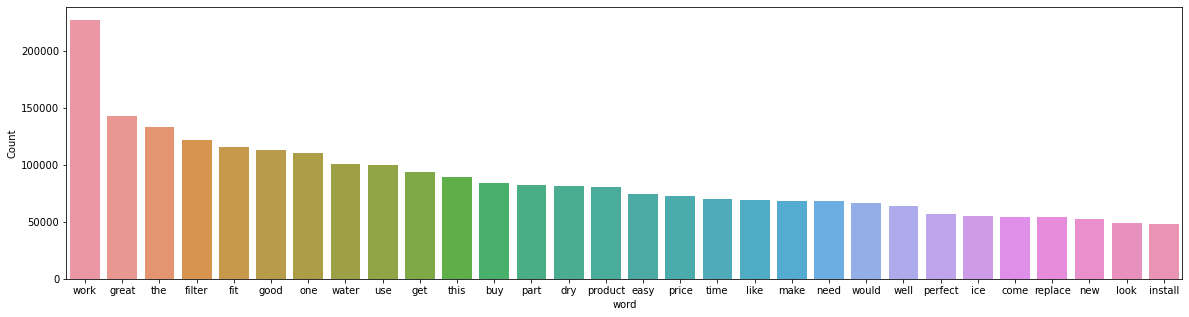

In [33]:
freq_words(df['clean'])

In [34]:
import wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

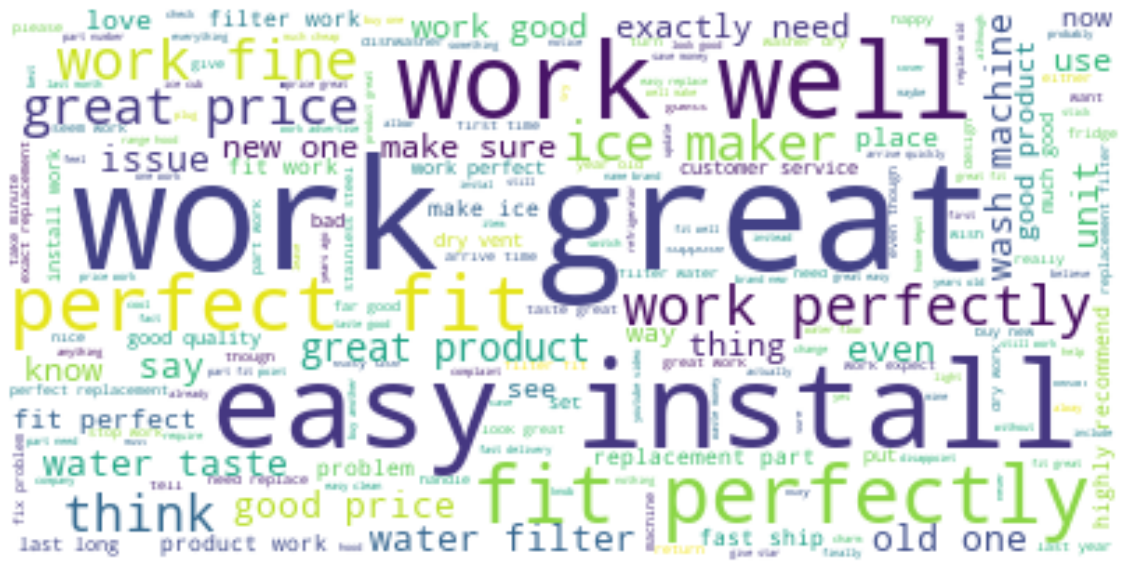

In [35]:
text = " ".join(i for i in df['clean'])
wordcloud = WordCloud(background_color="white").generate(text)
plt.figure(figsize=(20,20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Feature Extraction

In [36]:
from nltk.collocations import *
from nltk.util import ngrams

In [37]:
word_list = ' '.join([i for i in df['clean']]).split()

In [38]:
(pd.Series(nltk.ngrams(word_list, 2)).value_counts())[:20]

(work, great)        53151
(easy, install)      29176
(work, well)         23025
(fit, perfectly)     18596
(perfect, fit)       17181
(work, perfectly)    16467
(work, fine)         16317
(great, price)       14384
(ice, maker)         14284
(great, product)     11938
(work, like)         10825
(water, taste)       10351
(good, price)         9730
(water, filter)       9704
(wash, machine)       8765
(work, good)          7848
(make, sure)          7831
(old, one)            7524
(exactly, need)       7327
(fit, perfect)        7215
dtype: int64

In [39]:
(pd.Series(nltk.ngrams(word_list, 3)).value_counts())[:20]

(easy, install, work)     4629
(work, like, charm)       3965
(water, taste, great)     2964
(work, great, work)       2710
(work, great, easy)       2368
(water, taste, good)      2138
(install, work, great)    2078
(great, easy, install)    1996
(work, like, new)         1961
(save, lot, money)        1733
(product, work, great)    1674
(filter, work, great)     1666
(fit, perfectly, work)    1609
(work, great, great)      1553
(work, great, fit)        1535
(great, work, great)      1500
(would, buy, again)       1452
(perfect, fit, work)      1391
(fit, work, great)        1388
(work, great, the)        1360
dtype: int64

In [40]:
search_word = ["love", "like", "hate", "great", "nice", 'the']

no_opinion = ' '.join((filter(lambda val: val not in search_word, list(word_list)))).split()

In [41]:
(pd.Series(nltk.ngrams(no_opinion, 2)).value_counts())[:20]

(easy, install)      29177
(work, well)         23143
(fit, perfectly)     18598
(perfect, fit)       17222
(work, perfectly)    16481
(work, fine)         16333
(ice, maker)         14284
(water, taste)       10417
(good, price)         9986
(water, filter)       9828
(work, good)          9127
(wash, machine)       8774
(make, sure)          7831
(old, one)            7529
(exactly, need)       7333
(fit, perfect)        7279
(work, perfect)       7143
(new, one)            6713
(good, product)       6615
(make, ice)           6438
dtype: int64

In [42]:
(pd.Series(nltk.ngrams(no_opinion, 3)).value_counts())[:20]

(easy, install, work)     4655
(water, taste, good)      2231
(work, easy, install)     1921
(save, lot, money)        1733
(fit, perfectly, work)    1621
(would, buy, again)       1453
(perfect, fit, work)      1410
(seem, work, fine)        1341
(very, easy, install)     1300
(arp, rvw, txt)           1265
(link, link, class)       1265
(ref, arp, rvw)           1265
(rvw, txt, utf)           1265
(class, link, normal)     1265
(link, class, link)       1265
(link, normal, href)      1265
(product, link, link)     1265
(hook, product, link)     1265
(data, hook, product)     1265
(big, box, store)         1193
dtype: int64

## Sentiment Analysis

In [43]:
review['overall'].value_counts()
df['rating'] = review['overall']

In [44]:
def label_func(rating):
    if rating <= 2:
        return 'negative'
    if rating >= 4:
        return 'positive'
    else:
        return 'neutral'

df['sentiment'] = df['rating'].apply(label_func)

In [45]:
positive_review = df[(df["sentiment"] == 'positive')]['clean'].to_frame()
neutral_review = df[(df["sentiment"] == 'neutral')]['clean'].to_frame()
negative_review = df[(df["sentiment"] == 'negative')]['clean'].to_frame()

In [46]:
pos_clean = ' '.join([i for i in positive_review['clean']]).split()
neutral_clean = ' '.join([i for i in neutral_review['clean']]).split()
neg_clean = ' '.join([i for i in negative_review['clean']]).split()

In [47]:
pos_clean = ' '.join((filter(lambda val: val not in search_word, list(pos_clean)))).split()
neutral_clean = ' '.join((filter(lambda val: val not in search_word, list(neutral_clean)))).split()
neg_clean = ' '.join((filter(lambda val: val not in search_word, list(neg_clean)))).split()

In [48]:
text_corpus_positive_review = ' '.join(pos_clean)
text_corpus_neutral_review = ' '.join(neutral_clean)
text_corpus_negative_review = ' '.join(neg_clean)

In [49]:
def most_common_word_func(text, n_words=25):

    words = word_tokenize(text)
    fdist = FreqDist(words) 
    
    n_words = n_words
    
    df_fdist = pd.DataFrame({'Word': fdist.keys(),
                             'Frequency': fdist.values()})
    df_fdist = df_fdist.sort_values(by='Frequency', ascending=False).head(n_words)
    
    return df_fdist

In [50]:
df_most_common_words_text_corpus_positive_review = most_common_word_func(text_corpus_positive_review)
df_most_common_words_text_corpus_neutral_review = most_common_word_func(text_corpus_neutral_review)
df_most_common_words_text_corpus_negative_review = most_common_word_func(text_corpus_negative_review)

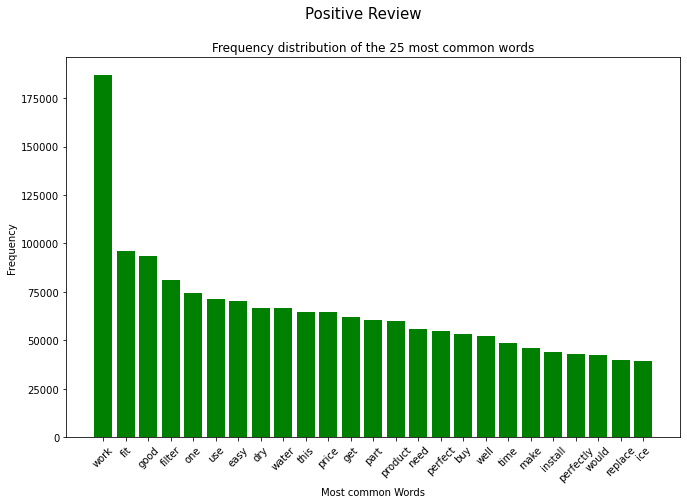

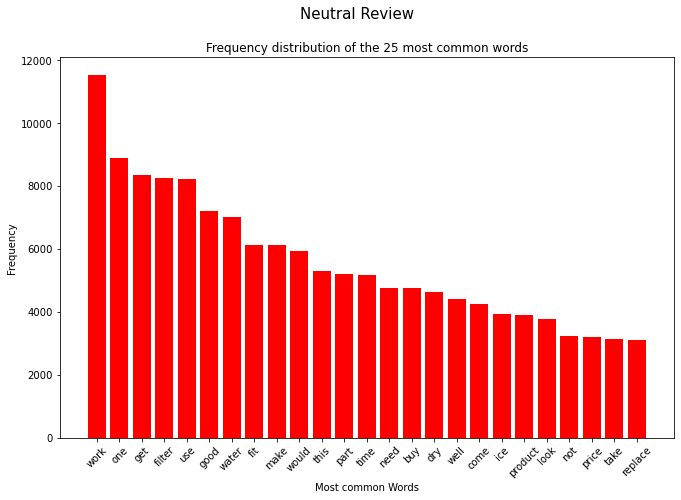

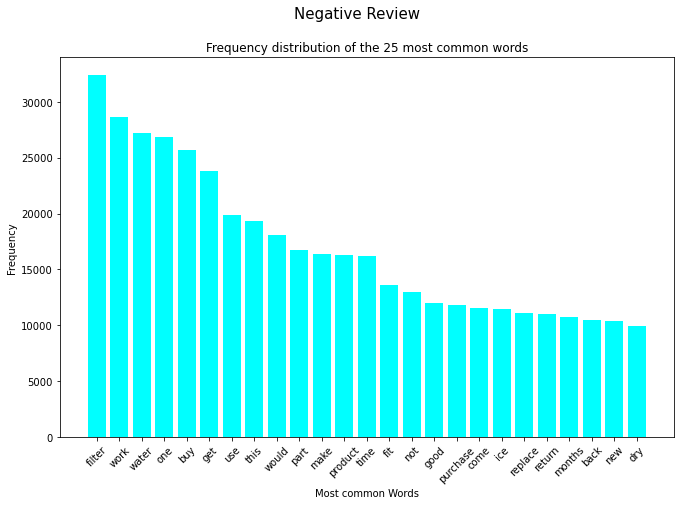

In [51]:
splited_data = [df_most_common_words_text_corpus_positive_review,
                df_most_common_words_text_corpus_neutral_review,
                df_most_common_words_text_corpus_negative_review]

color_list = ['green', 'red', 'cyan']
title_list = ['Positive Review', 'Neutral Review', 'Negative Review']


for item in range(3):
    plt.figure(figsize=(11,7))
    plt.bar(splited_data[item]['Word'], 
            splited_data[item]['Frequency'],
            color=color_list[item])
    plt.xticks(rotation = 45)
    plt.xlabel('Most common Words')
    plt.ylabel("Frequency")
    plt.title("Frequency distribution of the 25 most common words")
    plt.suptitle(title_list[item], fontsize=15)
    plt.show()

## Topic Modeling

In [52]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

dictionary = corpora.Dictionary(df['tokenized'])

In [53]:
doc_term_matrix = [dictionary.doc2bow(word) for word in df['tokenized']]

In [54]:
# Creating the object for LDA model using gensim library
LDA = gensim.models.ldamodel.LdaModel

# Build LDA model
lda_model = LDA(corpus=doc_term_matrix, id2word=dictionary, num_topics=7, random_state=100,
                chunksize=1000, passes=50)

In [55]:
##lda_model_1 = Lda_object(DT_matrix, num_topics=2, id2word = dictionary)

print(lda_model.print_topics(num_topics=6, num_words=5))

[(2, '0.021*"i" + 0.018*"new" + 0.018*"dryer" + 0.017*"ice" + 0.017*"one"'), (0, '0.032*"the" + 0.018*"oven" + 0.012*"a" + 0.012*"range" + 0.011*"plastic"'), (5, '0.057*"i" + 0.039*"product" + 0.032*"part" + 0.028*"price" + 0.023*"needed"'), (1, '0.086*"i" + 0.023*"it" + 0.010*"the" + 0.009*"would" + 0.008*"s"'), (3, '0.057*"water" + 0.045*"filter" + 0.038*"i" + 0.023*"filters" + 0.017*"one"'), (6, '0.117*"great" + 0.098*"works" + 0.050*"easy" + 0.049*"good" + 0.035*"install"')]


In [56]:
from textblob import TextBlob

df = df[df.Token_Count>2] # Whole Dataset

def norm_lemm_v_a_func_token(text):
    '''
    Lemmatize tokens
    
    Step 1: Use WordNetLemmatizer() with POS tag 'v' to lemmatize the created tokens     
    Step 2: Use WordNetLemmatizer() with POS tag 'a' to lemmatize the created tokens
    
    Args:
        text (str): String to which the functions are to be applied, string
    
    Returns:
        String with lemmatized words
    '''

    text1 = [WordNetLemmatizer().lemmatize(word, pos='v') for word in text]
    text2 = [WordNetLemmatizer().lemmatize(word, pos='a') for word in text1]
    return text2

# Filter out nouns (product-related features), verbs and subjective adverbs & adjs which reflect strong customer opinions.
word_len_threshold = 2
df['tagged_filtered'] = df['tagged'].apply(lambda x: [word for word, tag in x 
                                                    if len(word) > word_len_threshold and
                                                        (   tag.startswith("N") 
                                                        or tag.startswith("V")
                                                        or (tag.startswith("RB") and TextBlob(word).sentiment.subjectivity>0)
                                                        or (tag.startswith("J") and TextBlob(word).sentiment.subjectivity>0)  )])

df["tokenized_filtered"] = df['tagged_filtered'].apply(norm_lemm_v_a_func_token)

df

,reviewText,noStopword,tokenized,tagged,nouns,verbs,adjs,adverbs,Token_Count,lemmatized,clean,rating,sentiment,tagged_filtered,tokenized_filtered
0,"Not one thing in this book seemed an obvious original thought. However, the clarity with which this author explains how innovation happens is remarkable.\n\nAlan Gregerman discusses the meaning of...",not one thing book seemed obvious original thought however clarity author explains innovation happens remarkable alan gregerman discusses meaning human interactions kinds situations tend inspir...,"[not, one, thing, book, seemed, obvious, original, thought, however, clarity, author, explains, innovation, happens, remarkable, alan, gregerman, discusses, meaning, human, interactions, kinds, si...","[(not, RB), (one, CD), (thing, NN), (book, NN), (seemed, VBD), (obvious, JJ), (original, JJ), (thought, VBN), (however, RB), (clarity, NN), (author, NN), (explains, VBZ), (innovation, NN), (happen...","[thing, book, clarity, author, innovation, gregerman, interactions, kinds, situations, inspire, thinking, innovation, things, people, situations, patterns, identifies, ingredients, innovation, peo...","[seemed, thought, explains, happens, discusses, meaning, tend, leads, include, communicate, make, includes, compelled, wouldn, leading, recommend]","[obvious, original, remarkable, alan, human, original, clear, certain, normal, gregerman, interact, t, phenomenon, occur, individual, i, common, apparent]","[not, however, likely, normally, sometimes, sometimes, away]",78,not one thing book seem obvious original think however clarity author explain innovation happen remarkable alan gregerman discuss mean human interactions kinds situations tend inspire original and...,not one thing book seem obvious original think however clarity author explain innovation happen remarkable alan gregerman discuss mean human interactions kinds situations tend inspire original and...,5,positive,"[thing, book, seemed, obvious, original, thought, clarity, author, explains, innovation, happens, remarkable, gregerman, discusses, meaning, human, interactions, kinds, situations, tend, inspire, ...","[thing, book, seem, obvious, original, think, clarity, author, explain, innovation, happen, remarkable, gregerman, discuss, mean, human, interactions, kinds, situations, tend, inspire, original, c..."
1,I have enjoyed Dr. Alan Gregerman's weekly blog ([...] and two previous books since taking an innovation class with Alan over a decade ago. He opened my eyes to seeing the world in a fresh way an...,i enjoyed dr alan gregerman s weekly blog two previous books since taking innovation class alan decade ago he opened eyes seeing world fresh way also taught structured techniques i use in...,"[i, enjoyed, dr, alan, gregerman, s, weekly, blog, two, previous, books, since, taking, innovation, class, alan, decade, ago, he, opened, eyes, seeing, world, fresh, way, also, taught, structured,...","[(i, JJ), (enjoyed, VBD), (dr, NN), (alan, NN), (gregerman, JJ), (s, JJ), (weekly, JJ), (blog, NN), (two, CD), (previous, JJ), (books, NNS), (since, IN), (taking, VBG), (innovation, NN), (class, N...","[dr, alan, blog, books, innovation, class, alan, decade, eyes, world, way, techniques, creative, problem, skills, individuals, difference, invention, innovation, innovation, adaption, inventions, ...","[enjoyed, taking, opened, seeing, taught, i, use, solving, alan, makes, borrowed, cultures, surrounded, builds, delves, making, addressing, challenge, tackling, seeking, alan, borrows, storytellin...","[i, gregerman, s, weekly, previous, fresh, structured, increase, teams, untangles, easier, see, proven, previous, excellent, great, mix, memorable, newest, previous, critical, alternative, full, e...","[also, much, heavily, highly, recently, highly, s]",166,i enjoy dr alan gregerman s weekly blog two previous book since take innovation class alan decade ago he open eye see world fresh way also teach structure techniques i use increase creative proble...,e

In [57]:
# Divide dictonary into three sentiment states to understand the main user opinions in each of them.
df_pos = df[df.sentiment=="positive"]
df_neu = df[df.sentiment=="neutral"]
df_neg = df[df.sentiment=="negative"]

pos_dictionary = corpora.Dictionary(df_pos['tokenized_filtered'])
neu_dictionary = corpora.Dictionary(df_neu['tokenized_filtered'])
neg_dictionary = corpora.Dictionary(df_neg['tokenized_filtered'])

# Filter out tokens appear in 1) less than 1% of all reviews. (less representative) (no ) 2) more than 80% of all reviews (no benefit for topic distinguishing).
pos_dictionary.filter_extremes(no_below=0.01*len(pos_dictionary.token2id), no_above=0.8) 
neu_dictionary.filter_extremes(no_below=0.01*len(neu_dictionary.token2id), no_above=0.8) 
neg_dictionary.filter_extremes(no_below=0.01*len(neg_dictionary.token2id), no_above=0.8)

pos_doc_term_matrix = [pos_dictionary.doc2bow(word) for word in df_pos['tokenized_filtered']]
neu_doc_term_matrix = [neu_dictionary.doc2bow(word) for word in df_neu['tokenized_filtered']]
neg_doc_term_matrix = [neg_dictionary.doc2bow(word) for word in df_neg['tokenized_filtered']]

In [58]:
# LDA model parameter tuning

# from gensim.test.utils import common_texts
# from gensim.corpora.dictionary import Dictionary

# lda = gensim.models.ldamodel.LdaModel(corpus=pos_doc_term_matrix,
#                                            #id2word=pos_dictionary,
#                                            num_topics=20, 
#                                            random_state=100,
#                                            update_every=1,
#                                            chunksize=100,
#                                            passes=10,
#                                            alpha='auto',
#                                            per_word_topics=True)

pos_lda_model = LDA(corpus=pos_doc_term_matrix, id2word=pos_dictionary, num_topics=10, random_state=100, chunksize=100, passes=10)
neu_lda_model = LDA(corpus=neu_doc_term_matrix, id2word=neu_dictionary, num_topics=10, random_state=100, chunksize=100, passes=10)
neg_lda_model = LDA(corpus=neg_doc_term_matrix, id2word=neg_dictionary, num_topics=10, random_state=100, chunksize=100, passes=10)

In [59]:
# Topics in positive reviews.

print(pos_lda_model.print_topics(num_topics=10, num_words=5))

[(0, '0.200*"price" + 0.165*"product" + 0.115*"great" + 0.076*"need" + 0.073*"exactly"'), (1, '0.085*"work" + 0.069*"perfectly" + 0.045*"part" + 0.041*"original" + 0.030*"much"'), (2, '0.259*"fit" + 0.140*"perfect" + 0.088*"replacement" + 0.064*"good" + 0.053*"fast"'), (3, '0.265*"work" + 0.209*"great" + 0.141*"easy" + 0.070*"install" + 0.041*"good"'), (4, '0.089*"dry" + 0.038*"get" + 0.036*"keep" + 0.030*"washer" + 0.027*"use"'), (5, '0.041*"fridge" + 0.035*"refrigerator" + 0.025*"unit" + 0.021*"door" + 0.019*"make"'), (6, '0.088*"replace" + 0.068*"old" + 0.053*"new" + 0.049*"far" + 0.036*"right"'), (7, '0.041*"make" + 0.039*"ice" + 0.037*"look" + 0.030*"nice" + 0.030*"taste"'), (8, '0.099*"water" + 0.038*"order" + 0.032*"fix" + 0.030*"thank" + 0.029*"problem"'), (9, '0.120*"filter" + 0.053*"buy" + 0.048*"love" + 0.040*"time" + 0.037*"use"')]


The positive reviews mainly centered around the following topics:

1. Product Quality:
    (1) Material: "soft", "top"
    (2) Size: "fit"
    (3) Style: "cute", "look as expected", "color"
2. Product Price
    (1) "discount"
    (2) "worth the price"
    
Especially, many adverbs and adjs are used to express their strong satisfaction (different from neu/neg reviews): top, very, great, love, super, really.
   
This reveals that customers cares about product quality and prices, with material, size, style, discount as top deciding fatcors. They would describe good products as "look as expected from pictures".

In [60]:
# Topics in neutral reviews.

print(neu_lda_model.print_topics(num_topics=10, num_words=5))

[(0, '0.075*"fit" + 0.050*"good" + 0.043*"work" + 0.029*"price" + 0.021*"quality"'), (1, '0.066*"light" + 0.057*"set" + 0.039*"design" + 0.038*"look" + 0.034*"big"'), (2, '0.074*"hood" + 0.073*"size" + 0.062*"side" + 0.060*"instal" + 0.035*"need"'), (3, '0.068*"ice" + 0.060*"fridge" + 0.055*"top" + 0.034*"make" + 0.028*"service"'), (4, '0.063*"dry" + 0.041*"get" + 0.032*"clean" + 0.031*"use" + 0.030*"time"'), (5, '0.047*"give" + 0.033*"star" + 0.026*"far" + 0.026*"look" + 0.023*"hole"'), (6, '0.137*"filter" + 0.083*"original" + 0.056*"last" + 0.041*"refrigerator" + 0.037*"months"'), (7, '0.093*"part" + 0.033*"old" + 0.030*"replacement" + 0.028*"door" + 0.024*"break"'), (8, '0.099*"water" + 0.053*"machine" + 0.037*"freezer" + 0.037*"wash" + 0.037*"use"'), (9, '0.074*"work" + 0.039*"unit" + 0.031*"product" + 0.029*"get" + 0.024*"look"')]


The neutral reviews mainly centered around the following topics:

1. Family:
    (1) "daugher"
2. Product Size (controversial)
    (1) Some customers stated "fit"
    (2) Some stated that size might not be just right: "large" & "small", "short", "little"
    (3) "return": Some products might be returned
3. Product Look
    (1) "nice", "cute", "like picture"
   
Compared with positive reviews, neutral reviews became more controversial in consumer opinions, especially in product size. Many customers might be satisfied with the product quality and look, but just the size didn't fit. So they would give a neutral star.

In [61]:
# Topics in negative reviews.

print(neg_lda_model.print_topics(num_topics=10, num_words=5))

[(0, '0.081*"item" + 0.039*"remove" + 0.033*"range" + 0.030*"little" + 0.029*"seal"'), (1, '0.194*"filter" + 0.040*"issue" + 0.039*"wash" + 0.037*"replacement" + 0.024*"contact"'), (2, '0.035*"get" + 0.026*"dry" + 0.025*"unit" + 0.019*"use" + 0.017*"make"'), (3, '0.108*"machine" + 0.075*"model" + 0.063*"time" + 0.058*"company" + 0.041*"stave"'), (4, '0.082*"ice" + 0.032*"maker" + 0.031*"clothe" + 0.029*"washer" + 0.024*"cycle"'), (5, '0.056*"refrigerator" + 0.055*"service" + 0.050*"fridge" + 0.046*"call" + 0.038*"stop"'), (6, '0.101*"water" + 0.067*"work" + 0.049*"months" + 0.035*"time" + 0.032*"buy"'), (7, '0.101*"part" + 0.091*"fit" + 0.043*"return" + 0.038*"work" + 0.036*"order"'), (8, '0.047*"buy" + 0.039*"years" + 0.033*"product" + 0.026*"old" + 0.025*"quality"'), (9, '0.104*"break" + 0.069*"repair" + 0.059*"money" + 0.048*"samsung" + 0.041*"waste"')]


The negative reviews mainly centered around the following topics:

1. Product Size (controversial)
    (1) Some customers stated "fit" (but might be not fit and the not was not captured by topic modeling)
    (2) Some stated that size might not be just right: "large" & "small", "short", "little"
    (3) "return": Some products might be returned
2. Product Price
    (1) "cheap"
   
Compared with pos/neu reviews, negative reviews are still controversial in consumer opinions, especially in product size. Also, the product might be cheap or look cheap, which did not match customers' expectations.

In [62]:
# Aggregate review tokens into bi-grams and tri-grams to better understand structured user opinions instead of scattered words.
def ngram(text):
    """
    Transform the review text into all bigram and trigram combinations.
    
    Input: String of text.
    
    Output: A list of all bigram and trigram combinations of the input text. Each combination is a string.
    
    """
    return [" ".join(phrase) for phrase in list(nltk.ngrams(text.split(), 2))] + [" ".join(phrase) for phrase in list(nltk.ngrams(text.split(), 3))]


df["bigram"] = df["clean"].apply(ngram)

# Divide dictonary into three sentiment states to understand the main user opinions in each of them.
df_pos_ng = df[df.sentiment=="positive"]
df_neu_ng = df[df.sentiment=="neutral"]
df_neg_ng = df[df.sentiment=="negative"]

ng_pos_dictionary = corpora.Dictionary(df_pos_ng['bigram'])
ng_neu_dictionary = corpora.Dictionary(df_neu_ng['bigram'])
ng_neg_dictionary = corpora.Dictionary(df_neg_ng['bigram'])

# Filter out tokens appear in 1) less than 3 reviews. (less representative) (no ) 2) more than 80% of all reviews (no benefit for topic distinguishing).
ng_pos_dictionary.filter_extremes(no_below=3, no_above=0.8) 
ng_neu_dictionary.filter_extremes(no_below=3, no_above=0.8) 
ng_neg_dictionary.filter_extremes(no_below=3, no_above=0.8)

ng_pos_doc_term_matrix = [ng_pos_dictionary.doc2bow(word) for word in df_pos_ng['bigram']]
ng_neu_doc_term_matrix = [ng_neu_dictionary.doc2bow(word) for word in df_neu_ng['bigram']]
ng_neg_doc_term_matrix = [ng_neg_dictionary.doc2bow(word) for word in df_neg_ng['bigram']]

df

,reviewText,noStopword,tokenized,tagged,nouns,verbs,adjs,adverbs,Token_Count,lemmatized,clean,rating,sentiment,tagged_filtered,tokenized_filtered,bigram
0,"Not one thing in this book seemed an obvious original thought. However, the clarity with which this author explains how innovation happens is remarkable.\n\nAlan Gregerman discusses the meaning of...",not one thing book seemed obvious original thought however clarity author explains innovation happens remarkable alan gregerman discusses meaning human interactions kinds situations tend inspir...,"[not, one, thing, book, seemed, obvious, original, thought, however, clarity, author, explains, innovation, happens, remarkable, alan, gregerman, discusses, meaning, human, interactions, kinds, si...","[(not, RB), (one, CD), (thing, NN), (book, NN), (seemed, VBD), (obvious, JJ), (original, JJ), (thought, VBN), (however, RB), (clarity, NN), (author, NN), (explains, VBZ), (innovation, NN), (happen...","[thing, book, clarity, author, innovation, gregerman, interactions, kinds, situations, inspire, thinking, innovation, things, people, situations, patterns, identifies, ingredients, innovation, peo...","[seemed, thought, explains, happens, discusses, meaning, tend, leads, include, communicate, make, includes, compelled, wouldn, leading, recommend]","[obvious, original, remarkable, alan, human, original, clear, certain, normal, gregerman, interact, t, phenomenon, occur, individual, i, common, apparent]","[not, however, likely, normally, sometimes, sometimes, away]",78,not one thing book seem obvious original think however clarity author explain innovation happen remarkable alan gregerman discuss mean human interactions kinds situations tend inspire original and...,not one thing book seem obvious original think however clarity author explain innovation happen remarkable alan gregerman discuss mean human interactions kinds situations tend inspire original and...,5,positive,"[thing, book, seemed, obvious, original, thought, clarity, author, explains, innovation, happens, remarkable, gregerman, discusses, meaning, human, interactions, kinds, situations, tend, inspire, ...","[thing, book, seem, obvious, original, think, clarity, author, explain, innovation, happen, remarkable, gregerman, discuss, mean, human, interactions, kinds, situations, tend, inspire, original, c...","[not one, one thing, thing book, book seem, seem obvious, obvious original, original think, think however, however clarity, clarity author, author explain, explain innovation, innovation happen, h..."
1,I have enjoyed Dr. Alan Gregerman's weekly blog ([...] and two previous books since taking an innovation class with Alan over a decade ago. He opened my eyes to seeing the world in a fresh way an...,i enjoyed dr alan gregerman s weekly blog two previous books since taking innovation class alan decade ago he opened eyes seeing world fresh way also taught structured techniques i use in...,"[i, enjoyed, dr, alan, gregerman, s, weekly, blog, two, previous, books, since, taking, innovation, class, alan, decade, ago, he, opened, eyes, seeing, world, fresh, way, also, taught, structured,...","[(i, JJ), (enjoyed, VBD), (dr, NN), (alan, NN), (gregerman, JJ), (s, JJ), (weekly, JJ), (blog, NN), (two, CD), (previous, JJ), (books, NNS), (since, IN), (taking, VBG), (innovation, NN), (class, N...","[dr, alan, blog, books, innovation, class, alan, decade, eyes, world, way, techniques, creative, problem, skills, individuals, difference, invention, innovation, innovation, adaption, inventions, ...","[enjoyed, taking, opened, seeing, taught, i, use, solving, alan, makes, borrowed, cultures, surrounded, builds, delves, making, addressing, challenge, tackling, seeking, alan, borrows, storytellin...","[i, gregerman, s, weekly, previous, fresh, structured, increase, teams, untangles, easier, see, proven, previous, excellent, great, mix, memorable, newest, previous, critical, alternative, full, e...","[also, much, heavily, highly, recently, highly, 

In [63]:
ng_pos_dictionary.token2id

{'alan gregerman': 0,
 'away home': 1,
 'clear think': 2,
 'common sense': 3,
 'not one': 4,
 'one thing': 5,
 'original and': 6,
 'original think': 7,
 'seem obvious': 8,
 'these things': 9,
 'this include': 10,
 'book the': 11,
 'challenge the': 12,
 'easy see': 13,
 'excellent great': 14,
 'highly recommend': 15,
 'make connections': 16,
 'make much': 17,
 'make much easy': 18,
 'much easy': 19,
 'necessity strangers': 20,
 'outside one': 21,
 'people talk': 22,
 'personal experience': 23,
 'power make': 24,
 'problem solve': 25,
 'since take': 26,
 'the book': 27,
 'the necessity': 28,
 'the necessity strangers': 29,
 'way also': 30,
 'would highly': 31,
 'would highly recommend': 32,
 'matter the': 33,
 'quick read': 34,
 'read keep': 35,
 'point view': 36,
 'already know': 37,
 'another type': 38,
 'best way': 39,
 'catch eye': 40,
 'change life': 41,
 'connect the': 42,
 'could also': 43,
 'could change': 44,
 'could say': 45,
 'course could': 46,
 'create new': 47,
 'else need'

In [64]:
# LDA model parameter tuning

LDA = gensim.models.ldamodel.LdaModel

ng_pos_lda_model = LDA(corpus=ng_pos_doc_term_matrix, id2word=ng_pos_dictionary, num_topics=8, random_state=100, chunksize=100, passes=10)
ng_neu_lda_model = LDA(corpus=ng_neu_doc_term_matrix, id2word=ng_neu_dictionary, num_topics=8, random_state=100, chunksize=100, passes=10)
ng_neg_lda_model = LDA(corpus=ng_neg_doc_term_matrix, id2word=ng_neg_dictionary, num_topics=8, random_state=100, chunksize=100, passes=10)

In [65]:
# Topics in positive reviews.

for topic in ng_pos_lda_model.print_topics(num_topics=8, num_words=6):
    print("Topic {}: {}".format(topic[0], topic[1]))

Topic 0: 0.019*"exactly need" + 0.012*"old one" + 0.011*"good product" + 0.010*"like new" + 0.010*"taste great" + 0.009*"fix problem"
Topic 1: 0.036*"perfect fit" + 0.013*"wash machine" + 0.009*"much good" + 0.007*"would recommend" + 0.007*"washer dry" + 0.006*"the part"
Topic 2: 0.066*"work great" + 0.012*"fit work" + 0.012*"easy install" + 0.009*"look great" + 0.009*"look like" + 0.008*"install work"
Topic 3: 0.041*"fit perfectly" + 0.022*"good price" + 0.020*"great product" + 0.016*"ice maker" + 0.009*"arrive time" + 0.008*"exact replacement"
Topic 4: 0.034*"easy install" + 0.021*"great price" + 0.019*"work great" + 0.013*"water taste" + 0.011*"fit perfect" + 0.011*"water filter"
Topic 5: 0.066*"work well" + 0.017*"work good" + 0.016*"work perfect" + 0.015*"far good" + 0.012*"arrive quickly" + 0.012*"seem work"
Topic 6: 0.035*"work perfectly" + 0.023*"work like" + 0.014*"fast ship" + 0.009*"like charm" + 0.009*"work like charm" + 0.009*"like original"
Topic 7: 0.015*"work fine" + 0.

The positive reviews mainly centered around the following topics:

Pros:
1. Great quality
2. Size fit
3. Look good
4. Comfortable
5. Like Picture and Product Description
6. Discount

All compliments, very few complaints.
    
This is aligned with the word-level topic modeling on positive reviews.

In [66]:
# Topics in neutral reviews.

for topic in ng_neu_lda_model.print_topics(num_topics=8, num_words=6):
    print("Topic {}: {}".format(topic[0], topic[1]))

Topic 0: 0.009*"can not" + 0.008*"look good" + 0.007*"replacement part" + 0.006*"the part" + 0.005*"wash machine" + 0.004*"take long"
Topic 1: 0.025*"work fine" + 0.007*"look great" + 0.006*"work good" + 0.006*"fit perfectly" + 0.005*"the filter" + 0.005*"exact replacement"
Topic 2: 0.014*"work great" + 0.008*"work well" + 0.006*"even though" + 0.005*"three star" + 0.005*"still work" + 0.005*"buy new"
Topic 3: 0.012*"ice maker" + 0.012*"work well" + 0.008*"last long" + 0.007*"stainless steel" + 0.007*"new one" + 0.006*"make sure"
Topic 4: 0.013*"make work" + 0.010*"the product" + 0.009*"long time" + 0.008*"make ice" + 0.007*"first one" + 0.007*"nice look"
Topic 5: 0.018*"give star" + 0.013*"good quality" + 0.011*"think would" + 0.009*"would give" + 0.007*"send back" + 0.006*"stave top"
Topic 6: 0.009*"customer service" + 0.007*"range hood" + 0.005*"year old" + 0.004*"really like" + 0.003*"seem like" + 0.003*"vent hood"
Topic 7: 0.013*"look like" + 0.010*"fit well" + 0.010*"easy install

The neutral reviews mainly centered around the following topics:

Pros:
1. Great quality
2. Size fit (for some)
3. Look good

Cons:
1. Size might be too large or small. Not fitting well.

Compliments and complaints mixed together.
    
This is aligned with the word-level topic modeling on neutral reviews. The major complaints centered around size due to online shopping.

In [67]:
# Topics in negative reviews.

for topic in ng_neg_lda_model.print_topics(num_topics=8, num_words=6):
    print("Topic {}: {}".format(topic[0], topic[1]))

Topic 0: 0.015*"waste money" + 0.008*"look like" + 0.007*"new one" + 0.006*"poor quality" + 0.006*"control panel" + 0.006*"would recommend"
Topic 1: 0.011*"buy another" + 0.011*"years old" + 0.010*"another one" + 0.009*"replacement part" + 0.008*"last months" + 0.007*"save money"
Topic 2: 0.012*"send back" + 0.006*"doesnt fit" + 0.006*"time money" + 0.006*"first time" + 0.006*"waste time" + 0.004*"shut off"
Topic 3: 0.013*"customer service" + 0.006*"not buy" + 0.005*"this product" + 0.005*"very disappoint" + 0.004*"never buy" + 0.004*"buy this"
Topic 4: 0.012*"even though" + 0.009*"water taste" + 0.007*"stainless steel" + 0.007*"model number" + 0.006*"last years" + 0.006*"buy product"
Topic 5: 0.024*"stop work" + 0.014*"water filter" + 0.006*"filter leak" + 0.005*"water come" + 0.004*"old filter" + 0.004*"tap water"
Topic 6: 0.009*"wash machine" + 0.009*"the filter" + 0.005*"last long" + 0.005*"two weeks" + 0.004*"washer dry" + 0.004*"don buy"
Topic 7: 0.022*"ice maker" + 0.012*"work f

The negative reviews mainly centered around the following topics:

Cons:
1. Size: Not fitting well ("way big", "extra large").
2. Quality: "poorly make", "poor quality", "look cheap", "fall apart", "cheaply make".
3. Expectation: "very disappointing", "send back", "nothing like picture".
4. Price: "waste money".

Mostly complaints, few compliments.
    
This is aligned with the word-level topic modeling on negative reviews. The major complaints centered around size, quality, price, not as expectation. Customers also mentioned that they sended back the products.

In [68]:
# Try another set of params
def ngram(text):
    """
    Transform the review text into all bigram and trigram combinations.
    
    Input: String of text.
    
    Output: A list of all bigram and trigram combinations of the input text. Each combination is a string.
    
    """
    return [" ".join(phrase) for phrase in list(nltk.ngrams(text.split(), 2))] + [" ".join(phrase) for phrase in list(nltk.ngrams(text.split(), 3))]


df["bigram"] = df["clean"].apply(ngram)

# Divide dictonary into three sentiment states to understand the main user opinions in each of them.
df_pos_ng = df[df.sentiment=="positive"]
df_neu_ng = df[df.sentiment=="neutral"]
df_neg_ng = df[df.sentiment=="negative"]

ng_pos_dictionary = corpora.Dictionary(df_pos_ng['bigram'])
ng_neu_dictionary = corpora.Dictionary(df_neu_ng['bigram'])
ng_neg_dictionary = corpora.Dictionary(df_neg_ng['bigram'])

# Filter out tokens appear in 1) less than 50 reviews. (less representative) (no ) 2) more than 80% of all reviews (no benefit for topic distinguishing).
ng_pos_dictionary.filter_extremes(no_below=50, no_above=0.8) 
ng_neu_dictionary.filter_extremes(no_below=50, no_above=0.8) 
ng_neg_dictionary.filter_extremes(no_below=50, no_above=0.8)

ng_pos_doc_term_matrix = [ng_pos_dictionary.doc2bow(word) for word in df_pos_ng['bigram']]
ng_neu_doc_term_matrix = [ng_neu_dictionary.doc2bow(word) for word in df_neu_ng['bigram']]
ng_neg_doc_term_matrix = [ng_neg_dictionary.doc2bow(word) for word in df_neg_ng['bigram']]

df

,reviewText,noStopword,tokenized,tagged,nouns,verbs,adjs,adverbs,Token_Count,lemmatized,clean,rating,sentiment,tagged_filtered,tokenized_filtered,bigram
0,"Not one thing in this book seemed an obvious original thought. However, the clarity with which this author explains how innovation happens is remarkable.\n\nAlan Gregerman discusses the meaning of...",not one thing book seemed obvious original thought however clarity author explains innovation happens remarkable alan gregerman discusses meaning human interactions kinds situations tend inspir...,"[not, one, thing, book, seemed, obvious, original, thought, however, clarity, author, explains, innovation, happens, remarkable, alan, gregerman, discusses, meaning, human, interactions, kinds, si...","[(not, RB), (one, CD), (thing, NN), (book, NN), (seemed, VBD), (obvious, JJ), (original, JJ), (thought, VBN), (however, RB), (clarity, NN), (author, NN), (explains, VBZ), (innovation, NN), (happen...","[thing, book, clarity, author, innovation, gregerman, interactions, kinds, situations, inspire, thinking, innovation, things, people, situations, patterns, identifies, ingredients, innovation, peo...","[seemed, thought, explains, happens, discusses, meaning, tend, leads, include, communicate, make, includes, compelled, wouldn, leading, recommend]","[obvious, original, remarkable, alan, human, original, clear, certain, normal, gregerman, interact, t, phenomenon, occur, individual, i, common, apparent]","[not, however, likely, normally, sometimes, sometimes, away]",78,not one thing book seem obvious original think however clarity author explain innovation happen remarkable alan gregerman discuss mean human interactions kinds situations tend inspire original and...,not one thing book seem obvious original think however clarity author explain innovation happen remarkable alan gregerman discuss mean human interactions kinds situations tend inspire original and...,5,positive,"[thing, book, seemed, obvious, original, thought, clarity, author, explains, innovation, happens, remarkable, gregerman, discusses, meaning, human, interactions, kinds, situations, tend, inspire, ...","[thing, book, seem, obvious, original, think, clarity, author, explain, innovation, happen, remarkable, gregerman, discuss, mean, human, interactions, kinds, situations, tend, inspire, original, c...","[not one, one thing, thing book, book seem, seem obvious, obvious original, original think, think however, however clarity, clarity author, author explain, explain innovation, innovation happen, h..."
1,I have enjoyed Dr. Alan Gregerman's weekly blog ([...] and two previous books since taking an innovation class with Alan over a decade ago. He opened my eyes to seeing the world in a fresh way an...,i enjoyed dr alan gregerman s weekly blog two previous books since taking innovation class alan decade ago he opened eyes seeing world fresh way also taught structured techniques i use in...,"[i, enjoyed, dr, alan, gregerman, s, weekly, blog, two, previous, books, since, taking, innovation, class, alan, decade, ago, he, opened, eyes, seeing, world, fresh, way, also, taught, structured,...","[(i, JJ), (enjoyed, VBD), (dr, NN), (alan, NN), (gregerman, JJ), (s, JJ), (weekly, JJ), (blog, NN), (two, CD), (previous, JJ), (books, NNS), (since, IN), (taking, VBG), (innovation, NN), (class, N...","[dr, alan, blog, books, innovation, class, alan, decade, eyes, world, way, techniques, creative, problem, skills, individuals, difference, invention, innovation, innovation, adaption, inventions, ...","[enjoyed, taking, opened, seeing, taught, i, use, solving, alan, makes, borrowed, cultures, surrounded, builds, delves, making, addressing, challenge, tackling, seeking, alan, borrows, storytellin...","[i, gregerman, s, weekly, previous, fresh, structured, increase, teams, untangles, easier, see, proven, previous, excellent, great, mix, memorable, newest, previous, critical, alternative, full, e...","[also, much, heavily, highly, recently, highly, 

In [69]:
ng_pos_dictionary.token2id

{'common sense': 0,
 'not one': 1,
 'one thing': 2,
 'these things': 3,
 'easy see': 4,
 'highly recommend': 5,
 'make much': 6,
 'make much easy': 7,
 'much easy': 8,
 'problem solve': 9,
 'since take': 10,
 'would highly': 11,
 'would highly recommend': 12,
 'already know': 13,
 'best way': 14,
 'change life': 15,
 'could also': 16,
 'could change': 17,
 'else need': 18,
 'family members': 19,
 'find right': 20,
 'get past': 21,
 'great deal': 22,
 'know well': 23,
 'never hear': 24,
 'never make': 25,
 'nothing else': 26,
 'one family': 27,
 'one favorite': 28,
 'someone else': 29,
 'the best': 30,
 'the new': 31,
 'time effort': 32,
 'well really': 33,
 'who know': 34,
 'the main': 35,
 'well receive': 36,
 'look around': 37,
 'look new': 38,
 'new good': 39,
 'can not': 40,
 'get work': 41,
 'great company': 42,
 'need get': 43,
 'right front': 44,
 'several years': 45,
 'the great': 46,
 'like say': 47,
 'need open': 48,
 'still recommend': 49,
 'that part': 50,
 'this good': 51,

In [70]:
# LDA model parameter tuning

LDA = gensim.models.ldamodel.LdaModel

ng_pos_lda_model2 = LDA(corpus=ng_pos_doc_term_matrix, id2word=ng_pos_dictionary, num_topics=8, random_state=100, chunksize=100, passes=10)
ng_neu_lda_model2 = LDA(corpus=ng_neu_doc_term_matrix, id2word=ng_neu_dictionary, num_topics=8, random_state=100, chunksize=100, passes=10)
ng_neg_lda_model2 = LDA(corpus=ng_neg_doc_term_matrix, id2word=ng_neg_dictionary, num_topics=8, random_state=100, chunksize=100, passes=10)

In [71]:
# Topics in positive reviews.

for topic in ng_pos_lda_model2.print_topics(num_topics=8, num_words=6):
    print("Topic {}: {}".format(topic[0], topic[1]))

Topic 0: 0.066*"easy install" + 0.032*"great price" + 0.020*"water taste" + 0.015*"wash machine" + 0.014*"highly recommend" + 0.012*"make sure"
Topic 1: 0.038*"fit perfectly" + 0.035*"perfect fit" + 0.009*"much good" + 0.008*"arrive time" + 0.007*"exact replacement" + 0.007*"replacement filter"
Topic 2: 0.020*"work fine" + 0.019*"work great" + 0.012*"ice maker" + 0.012*"exactly need" + 0.012*"water filter" + 0.010*"perfect replacement"
Topic 3: 0.082*"work great" + 0.050*"work well" + 0.024*"good price" + 0.017*"fit perfect" + 0.015*"fit work" + 0.011*"far good"
Topic 4: 0.009*"product work" + 0.008*"fix problem" + 0.007*"easy use" + 0.006*"very happy" + 0.005*"make ice" + 0.005*"product great"
Topic 5: 0.021*"fast ship" + 0.015*"good quality" + 0.013*"look like" + 0.009*"fit well" + 0.008*"great easy" + 0.008*"the part"
Topic 6: 0.032*"great product" + 0.013*"arrive quickly" + 0.011*"work expect" + 0.010*"part need" + 0.008*"great value" + 0.008*"stainless steel"
Topic 7: 0.039*"work 

In [72]:
# Topics in neutral reviews.

for topic in ng_neu_lda_model2.print_topics(num_topics=8, num_words=6):
    print("Topic {}: {}".format(topic[0], topic[1]))

Topic 0: 0.055*"ice maker" + 0.045*"make sure" + 0.034*"look good" + 0.022*"the product" + 0.021*"wash machine" + 0.020*"ice cub"
Topic 1: 0.048*"easy install" + 0.044*"work good" + 0.036*"this product" + 0.032*"need replace" + 0.025*"would buy" + 0.025*"original one"
Topic 2: 0.121*"work fine" + 0.048*"customer service" + 0.037*"range hood" + 0.027*"still work" + 0.027*"year old" + 0.024*"the unit"
Topic 3: 0.043*"last long" + 0.037*"new one" + 0.030*"old one" + 0.024*"buy new" + 0.024*"long time" + 0.024*"water filter"
Topic 4: 0.056*"give star" + 0.038*"look great" + 0.034*"think would" + 0.028*"would give" + 0.025*"would fit" + 0.023*"send back"
Topic 5: 0.090*"work great" + 0.041*"make work" + 0.041*"good quality" + 0.036*"even though" + 0.032*"fit perfectly" + 0.023*"get pay"
Topic 6: 0.133*"work well" + 0.056*"can not" + 0.053*"look like" + 0.039*"not sure" + 0.037*"part number" + 0.036*"seem work"
Topic 7: 0.046*"stainless steel" + 0.042*"replacement part" + 0.039*"fit well" + 

In [73]:
# Topics in negative reviews.

for topic in ng_neg_lda_model2.print_topics(num_topics=8, num_words=6):
    print("Topic {}: {}".format(topic[0], topic[1]))

Topic 0: 0.019*"not buy" + 0.016*"very disappoint" + 0.013*"new one" + 0.012*"waste money" + 0.012*"poor quality" + 0.011*"control panel"
Topic 1: 0.030*"customer service" + 0.018*"wash machine" + 0.015*"never buy" + 0.014*"buy another" + 0.012*"another one" + 0.010*"brand new"
Topic 2: 0.041*"ice maker" + 0.017*"can not" + 0.015*"make ice" + 0.009*"model number" + 0.008*"the part" + 0.008*"time money"
Topic 3: 0.046*"stop work" + 0.020*"work great" + 0.014*"would recommend" + 0.011*"filter leak" + 0.011*"make sure" + 0.009*"pay for"
Topic 4: 0.032*"work fine" + 0.023*"waste money" + 0.022*"this product" + 0.018*"filter work" + 0.017*"work well" + 0.013*"part number"
Topic 5: 0.026*"water filter" + 0.024*"the filter" + 0.021*"send back" + 0.020*"look like" + 0.016*"old one" + 0.013*"water flow"
Topic 6: 0.022*"years old" + 0.021*"water taste" + 0.018*"first one" + 0.017*"last months" + 0.014*"second one" + 0.013*"one year"
Topic 7: 0.024*"even though" + 0.015*"replacement part" + 0.014

## Feature Extraction

In [102]:
# Create an overall table that takes other variables into consideration
from datetime import datetime
data = pd.concat([review[["reviewTime", "reviewerID","reviewerName","vote"]], df], axis=1).reset_index(drop=True)
data = data[data.Token_Count>2]
data["vote"].fillna(0, inplace=True)
data["vote"] = [int(date.replace(",","")) if "," in str(date) else date for date in data.vote.values]
data["vote"] = data["vote"].astype("float64")
data["reviewTime"] = ["-".join(np.array(date.replace(",", "").split())[[2,0,1]]) for date in data["reviewTime"]]
data["reviewTime"] = [datetime. strptime(date[:-1]+"0"+date[-1], '%Y-%m-%d') if len(date)<10 
                                      else datetime. strptime(date, '%Y-%m-%d') for date in data["reviewTime"]]
max_date = data["reviewTime"].max()
data["day_gap"] = [(max_date - date).days for date in data["reviewTime"]]
data["year-month"] = [date.strftime("%Y-%m") for date in data["reviewTime"]]
data["year"] = [date.strftime("%Y") for date in data["reviewTime"]]
data.head(3)

,reviewTime,reviewerID,reviewerName,vote,reviewText,noStopword,tokenized,tagged,nouns,verbs,...,lemmatized,clean,rating,sentiment,tagged_filtered,tokenized_filtered,bigram,day_gap,year-month,year
0,2013-11-27,A3NHUQ33CFH3VM,Greeny,2.0,"Not one thing in this book seemed an obvious original thought. However, the clarity with which this author explains how innovation happens is remarkable.\n\nAlan Gregerman discusses the meaning of...",not one thing book seemed obvious original thought however clarity author explains innovation happens remarkable alan gregerman discusses meaning human interactions kinds situations tend inspir...,"[not, one, thing, book, seemed, obvious, original, thought, however, clarity, author, explains, innovation, happens, remarkable, alan, gregerman, discusses, meaning, human, interactions, kinds, si...","[(not, RB), (one, CD), (thing, NN), (book, NN), (seemed, VBD), (obvious, JJ), (original, JJ), (thought, VBN), (however, RB), (clarity, NN), (author, NN), (explains, VBZ), (innovation, NN), (happen...","[thing, book, clarity, author, innovation, gregerman, interactions, kinds, situations, inspire, thinking, innovation, things, people, situations, patterns, identifies, ingredients, innovation, peo...","[seemed, thought, explains, happens, discusses, meaning, tend, leads, include, communicate, make, includes, compelled, wouldn, leading, recommend]",...,not one thing book seem obvious original think however clarity author explain innovation happen remarkable alan gregerman discuss mean human interactions kinds situations tend inspire original and...,not one thing book seem obvious original think however clarity author explain innovation happen remarkable alan gregerman discuss mean human interactions kinds situations tend inspire original and...,5.0,positive,"[thing, book, seemed, obvious, original, thought, clarity, author, explains, innovation, happens, remarkable, gregerman, discusses, meaning, human, interactions, kinds, situations, tend, inspire, ...","[thing, book, seem, obvious, original, think, clarity, author, explain, innovation, happen, remarkable, gregerman, discuss, mean, human, interactions, kinds, situations, tend, inspire, original, c...","[not one, one thing, thing book, book seem, seem obvious, obvious original, original think, think however, however clarity, clarity author, author explain, explain innovation, innovation happen, h...",1772,2013-11,2013
1,2013-11-01,A3SK6VNBQDNBJE,Leif C. Ulstrup,0.0,I have enjoyed Dr. Alan Gregerman's weekly blog ([...] and two previous books since taking an innovation class with Alan over a decade ago. He opened my eyes to seeing the world in a fresh way an...,i enjoyed dr alan gregerman s weekly blog two previous books since taking innovation class alan decade ago he opened eyes seeing world fresh way also taught structured techniques i use in...,"[i, enjoyed, dr, alan, gregerman, s, weekly, blog, two, previous, books, since, taking, innovation, class, alan, decade, ago, he, opened, eyes, seeing, world, fresh, way, also, taught, structured,...","[(i, JJ), (enjoyed, VBD), (dr, NN), (alan, NN), (gregerman, JJ), (s, JJ), (weekly, JJ), (blog, NN), (two, CD), (previous, JJ), (books, NNS), (since, IN), (taking, VBG), (innovation, NN), (class, N...","[dr, alan, blog, books, innovation, class, alan, decade, eyes, world, way, techniques, creative, problem, skills, individuals, difference, invention, innovation, innovation, adaption, inventions, ...","[enjoyed, taking, opened, seeing, taught, i, use, solving, alan, makes, borrowed, cultures, surrounded, builds, delves, making, addressing, challenge, tackling, seeking, alan, borrows, storytellin...",...,i enjoy dr alan gregerman s weekly blog two previous book since take innovation class alan decade ago he open eye see world fresh way also teach structure techniques i use increase creative proble...,enjoy alan gregerman weekly blog two previous book since take innovation class alan decade ago open eye see world fresh 

In [103]:
# Check missing values: Only reviewerName has 81 missing values, could be ignored for now.
data.isnull().sum()

reviewTime             0
reviewerID             0
reviewerName          14
vote                   0
reviewText             0
noStopword             0
tokenized              0
tagged                 0
nouns                  0
verbs                  0
adjs                   0
adverbs                0
Token_Count            0
lemmatized             0
clean                  0
rating                 0
sentiment              0
tagged_filtered        0
tokenized_filtered     0
bigram                 0
day_gap                0
year-month             0
year                   0
dtype: int64

In [104]:
data[["vote","day_gap"]].corr()

,vote,day_gap
vote,1.000000,0.076855
day_gap,0.076855,1.000000


A high portion of review votes are 0, indicating they were not endorsed (or viewed) by any readers. The correlation between helpfulness votes and review publish dates (day_gap = max publish date - this review's publish date, counted in days) is low, indicating review views induced by publish time might not affect votes significantly.

In [105]:
data["rating"].sort_values().value_counts()

5.0    349066
4.0     66008
1.0     57579
3.0     28689
2.0     20031
Name: rating, dtype: int64

Text(0.5, 1.0, 'Distribution of User Ratings')

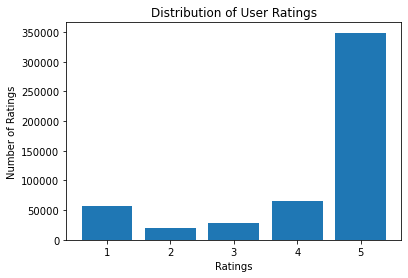

In [106]:
rating = pd.Series(data["rating"].value_counts()).sort_index()

plt.bar(rating.index, rating.values)
plt.xlabel("Ratings")
plt.ylabel("Number of Ratings")
plt.title("Distribution of User Ratings")

In [107]:
# Extract review features for importance ranking
import readability

data_tmp = data.copy() # Whole dataset

feature = pd.DataFrame()
feature["rating"] = data_tmp["rating"]
feature["vote"]  = data_tmp["vote"]
feature["length"] = data_tmp["Token_Count"]
feature["prop_of_noun"] = data_tmp["nouns"].str.len() / feature["length"]
feature["prop_of_verb"] = data_tmp["verbs"].str.len() / feature["length"]
feature["prop_of_adj_adverb"] = (data_tmp["adjs"].str.len() + data_tmp["adverbs"].str.len()) / feature["length"]
feature["subjectivity"] = data_tmp["clean"].apply(lambda x: TextBlob(x).sentiment.subjectivity)
feature["readability"] = data_tmp["reviewText"].apply(lambda x: readability.getmeasures(x, lang='en')['readability grades']['FleschReadingEase'])
feature

,rating,vote,length,prop_of_noun,prop_of_verb,prop_of_adj_adverb,subjectivity,readability
0,5.0,2.0,78.0,0.397436,0.205128,0.320513,0.526600,30.952083
1,5.0,0.0,166.0,0.427711,0.210843,0.253012,0.482276,22.456818
2,5.0,0.0,79.0,0.468354,0.278481,0.151899,0.524644,-51.306186
3,5.0,0.0,51.0,0.431373,0.196078,0.254902,0.615267,-12.250385
4,5.0,10.0,366.0,0.385246,0.226776,0.210383,0.461467,63.851500
...,...,...,...,...,...,...,...,...
602335,5.0,0.0,4.0,0.250000,0.250000,0.250000,1.000000,45.645000
602336,2.0,0.0,4.0,0.750000,0.000000,0.250000,0.450000,78.872857
602337,5.0,0.0,3.0,0.666667,0.000000,0.333333,1.000000,83.320000
602338,1.0,0.0,28.0,0.392857,0.214286,0.142857,0.300000,62.850465


In [108]:
feature.corr() # No strong correlation feature pair existed

,rating,vote,length,prop_of_noun,prop_of_verb,prop_of_adj_adverb,subjectivity,readability
rating,1.000000,0.000121,-0.152702,-0.025926,-0.091068,0.176002,0.215805,0.110601
vote,0.000121,1.000000,0.137363,-0.003237,0.013632,-0.017306,-0.006003,-0.049596
length,-0.152702,0.137363,1.000000,0.019417,0.050783,-0.126070,-0.052496,-0.497749
prop_of_noun,-0.025926,-0.003237,0.019417,1.000000,-0.460298,-0.409927,-0.028981,-0.037455
prop_of_verb,-0.091068,0.013632,0.050783,-0.460298,1.000000,-0.390729,-0.181980,-0.041484
prop_of_adj_adverb,0.176002,-0.017306,-0.126070,-0.409927,-0.390729,1.000000,0.282139,0.022568
subjectivity,0.215805,-0.006003,-0.052496,-0.028981,-0.181980,0.282139,1.000000,-0.027378
readability,0.110601,-0.049596,-0.497749,-0.037455,-0.041484,0.022568,-0.027378,1.000000


## Feature Importance

In [109]:
# Which feature best reflects user sentiment polarity (user satisfaction)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(
                        feature.iloc[:,1:].to_numpy(), data_tmp["rating"].to_numpy().reshape(-1), test_size=0.2, random_state=42)

D:\Tools\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:33: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  from ._gradient_boosting import predict_stages
D:\Tools\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:33: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  from ._gradient_boosting import predict_stages


In [110]:
# Grid Search CV to find the best set of params
grid = { 
    'n_estimators': [200,300,400,500],
    'max_features': ['sqrt','log2'],
    'max_depth' : [3,4,5,6,7],
    'random_state' : [18]
}

## Grid Search function
CV_rfr = GridSearchCV(estimator=RandomForestRegressor(), param_grid=grid, cv= 5)
CV_rfr.fit(X_train, y_train)

D:\Tools\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:443: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  fold_sizes = np.full(n_splits, n_samples // n_splits, dtype=np.int)
D:\Tools\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:93: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details

D:\Tools\Anaconda\lib\site-packages\sklearn\ensemble\_base.py:183: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)
D:\Tools\Anaconda\lib\site-packages\sklearn\ensemble\_base.py:183: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional i

D:\Tools\Anaconda\lib\site-packages\sklearn\ensemble\_base.py:183: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)
D:\Tools\Anaconda\lib\site-packages\sklearn\ensemble\_base.py:183: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional i

D:\Tools\Anaconda\lib\site-packages\sklearn\ensemble\_base.py:183: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)
D:\Tools\Anaconda\lib\site-packages\sklearn\ensemble\_base.py:183: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional i

D:\Tools\Anaconda\lib\site-packages\sklearn\ensemble\_base.py:183: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)
D:\Tools\Anaconda\lib\site-packages\sklearn\ensemble\_base.py:183: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional i

D:\Tools\Anaconda\lib\site-packages\sklearn\ensemble\_base.py:183: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)
D:\Tools\Anaconda\lib\site-packages\sklearn\ensemble\_base.py:183: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional i

D:\Tools\Anaconda\lib\site-packages\sklearn\ensemble\_base.py:183: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)
D:\Tools\Anaconda\lib\site-packages\sklearn\ensemble\_base.py:183: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional i

D:\Tools\Anaconda\lib\site-packages\sklearn\ensemble\_base.py:183: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)
D:\Tools\Anaconda\lib\site-packages\sklearn\ensemble\_base.py:183: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional i

D:\Tools\Anaconda\lib\site-packages\sklearn\ensemble\_base.py:183: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)
D:\Tools\Anaconda\lib\site-packages\sklearn\ensemble\_base.py:183: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional i

D:\Tools\Anaconda\lib\site-packages\sklearn\ensemble\_base.py:183: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)
D:\Tools\Anaconda\lib\site-packages\sklearn\ensemble\_base.py:183: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional i

D:\Tools\Anaconda\lib\site-packages\sklearn\ensemble\_base.py:183: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)
D:\Tools\Anaconda\lib\site-packages\sklearn\ensemble\_base.py:183: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional i

D:\Tools\Anaconda\lib\site-packages\sklearn\ensemble\_base.py:183: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)
D:\Tools\Anaconda\lib\site-packages\sklearn\ensemble\_base.py:183: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional i

D:\Tools\Anaconda\lib\site-packages\sklearn\ensemble\_base.py:183: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)
D:\Tools\Anaconda\lib\site-packages\sklearn\ensemble\_base.py:183: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional i

D:\Tools\Anaconda\lib\site-packages\sklearn\ensemble\_base.py:183: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)
D:\Tools\Anaconda\lib\site-packages\sklearn\ensemble\_base.py:183: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional i

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [3, 4, 5, 6, 7],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [200, 300, 400, 500],
                         'random_state': [18]})

In [111]:
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",CV_rfr.best_estimator_)
print("\n The best score across ALL searched params:\n",CV_rfr.best_score_)
print("\n The best parameters across ALL searched params:\n",CV_rfr.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 RandomForestRegressor(max_depth=7, max_features='sqrt', n_estimators=200,
                      random_state=18)

 The best score across ALL searched params:
 0.1472708108609859

 The best parameters across ALL searched params:
 {'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 200, 'random_state': 18}


In [112]:
rf = RandomForestRegressor(n_estimators = 300, max_features = 'sqrt', max_depth = 7, random_state = 18).fit(X_train, y_train)

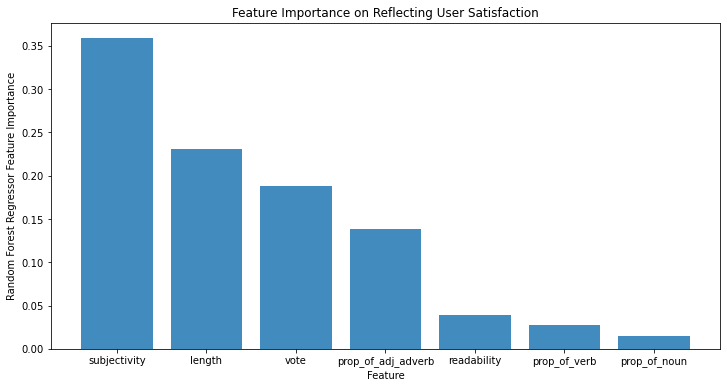

In [113]:
# Visualizations of Feature Importance
feature_name = feature.columns.values[1:][np.argsort(rf.feature_importances_)][::-1]
feature_importance = np.sort(rf.feature_importances_)[::-1]

fig = plt.figure(figsize=(12, 6))
plt.bar(feature_name, feature_importance, alpha=0.85)
plt.title("Feature Importance on Reflecting User Satisfaction")
plt.xlabel("Feature")
plt.ylabel("Random Forest Regressor Feature Importance")
plt.show()

It is observed that subjectivity has the highest feature importance on reflecting user satisfaction, followed by proportion of adjs & adverbs, length readability. This indicated that users with higher product satisfaction tended to give more subjective comments on the product, using higher portion of adjs and adverbs to highlight their feelings and satisfaction towards the product. Besides, users with higher satisfaction tended to write a longer review to document their experience in detail with higher corresponding text readability.

In [114]:
# Which features best influences review helpfulness
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

X_train, X_test, y_train, y_test = train_test_split(
                                                        feature[["rating"] + list(feature.columns)[2:]].to_numpy(), data_tmp["vote"].to_numpy().reshape(-1), 
                                                        test_size=0.2, random_state=42)

In [115]:
# The grid search CV was costing too much time and will be ran later. For the code below, an initial set of params were used.
grid_vote = { 
    'n_estimators': [200,300,400,500],
    'max_features': ['sqrt','log2'],
    'max_depth' : [3,4,5,6,7],
    'random_state' : [18] 
}

## Grid Search function
CV_rfr_vote = GridSearchCV(estimator=RandomForestRegressor(), param_grid=grid_vote, cv= 5)
CV_rfr_vote.fit(X_train, y_train)

D:\Tools\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:443: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  fold_sizes = np.full(n_splits, n_samples // n_splits, dtype=np.int)
D:\Tools\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:93: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details

D:\Tools\Anaconda\lib\site-packages\sklearn\ensemble\_base.py:183: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)
D:\Tools\Anaconda\lib\site-packages\sklearn\ensemble\_base.py:183: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional i

D:\Tools\Anaconda\lib\site-packages\sklearn\ensemble\_base.py:183: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)
D:\Tools\Anaconda\lib\site-packages\sklearn\ensemble\_base.py:183: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional i

D:\Tools\Anaconda\lib\site-packages\sklearn\ensemble\_base.py:183: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)
D:\Tools\Anaconda\lib\site-packages\sklearn\ensemble\_base.py:183: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional i

D:\Tools\Anaconda\lib\site-packages\sklearn\ensemble\_base.py:183: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)
D:\Tools\Anaconda\lib\site-packages\sklearn\ensemble\_base.py:183: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional i

D:\Tools\Anaconda\lib\site-packages\sklearn\ensemble\_base.py:183: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)
D:\Tools\Anaconda\lib\site-packages\sklearn\ensemble\_base.py:183: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional i

D:\Tools\Anaconda\lib\site-packages\sklearn\ensemble\_base.py:183: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)
D:\Tools\Anaconda\lib\site-packages\sklearn\ensemble\_base.py:183: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional i

D:\Tools\Anaconda\lib\site-packages\sklearn\ensemble\_base.py:183: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)
D:\Tools\Anaconda\lib\site-packages\sklearn\ensemble\_base.py:183: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional i

D:\Tools\Anaconda\lib\site-packages\sklearn\ensemble\_base.py:183: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)
D:\Tools\Anaconda\lib\site-packages\sklearn\ensemble\_base.py:183: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional i

D:\Tools\Anaconda\lib\site-packages\sklearn\ensemble\_base.py:183: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)
D:\Tools\Anaconda\lib\site-packages\sklearn\ensemble\_base.py:183: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional i

D:\Tools\Anaconda\lib\site-packages\sklearn\ensemble\_base.py:183: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)
D:\Tools\Anaconda\lib\site-packages\sklearn\ensemble\_base.py:183: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional i

D:\Tools\Anaconda\lib\site-packages\sklearn\ensemble\_base.py:183: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)
D:\Tools\Anaconda\lib\site-packages\sklearn\ensemble\_base.py:183: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional i

D:\Tools\Anaconda\lib\site-packages\sklearn\ensemble\_base.py:183: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)
D:\Tools\Anaconda\lib\site-packages\sklearn\ensemble\_base.py:183: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional i

D:\Tools\Anaconda\lib\site-packages\sklearn\ensemble\_base.py:183: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)
D:\Tools\Anaconda\lib\site-packages\sklearn\ensemble\_base.py:183: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional i

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [3, 4, 5, 6, 7],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [200, 300, 400, 500],
                         'random_state': [18]})

In [116]:
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",CV_rfr_vote.best_estimator_)
print("\n The best score across ALL searched params:\n",CV_rfr_vote.best_score_)
print("\n The best parameters across ALL searched params:\n",CV_rfr_vote.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 RandomForestRegressor(max_depth=7, max_features='sqrt', n_estimators=200,
                      random_state=18)

 The best score across ALL searched params:
 0.9453193539764231

 The best parameters across ALL searched params:
 {'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 200, 'random_state': 18}


In [117]:
rf_vote = RandomForestRegressor(n_estimators = 300, max_features = 'sqrt', max_depth = 5, random_state = 18).fit(X_train, y_train)

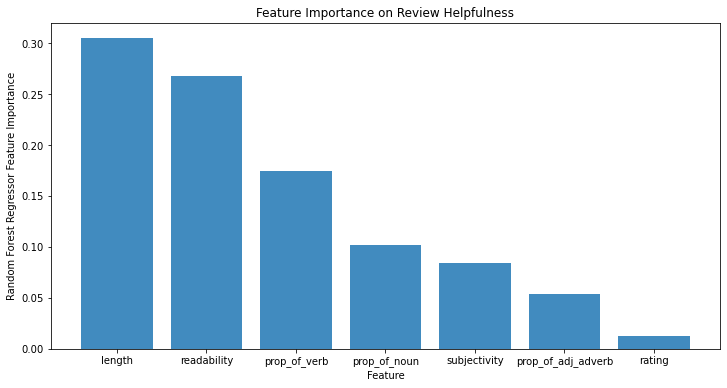

In [118]:
# Visualizations of Feature Importance
feature_name = np.array(["rating"] + list(feature.columns)[2:])[np.argsort(rf_vote.feature_importances_)][::-1]
feature_importance = np.sort(rf_vote.feature_importances_)[::-1]

fig = plt.figure(figsize=(12, 6))
plt.bar(feature_name, feature_importance, alpha=0.85)
plt.title("Feature Importance on Review Helpfulness")
plt.xlabel("Feature")
plt.ylabel("Random Forest Regressor Feature Importance")
plt.show()

Length is the most important feature that impacts review helpfulness, followed by readability, subjectivity, proportion of nouns. This implied that long reviews with good readability and subjective opinions had higher probability to be endorsed by readers since they provided more information on the product. The proportion of nouns might be correlated to the proportion of product-related feature terms mentioned in the reviews. A higher proportion of product-related feature terms indicated that more product features were discussed and evaluated in the reviews, thus providing readers with more relevant information on the product.

## Data Visualizations

In [119]:
# Aggregate current data for visualizations

feature_visual = pd.concat([data_tmp[["reviewTime","day_gap","year-month","year"]], feature], axis=1).reset_index(drop=True)
feature_visual

,reviewTime,day_gap,year-month,year,rating,vote,length,prop_of_noun,prop_of_verb,prop_of_adj_adverb,subjectivity,readability
0,2013-11-27,1772,2013-11,2013,5.0,2.0,78.0,0.397436,0.205128,0.320513,0.526600,30.952083
1,2013-11-01,1798,2013-11,2013,5.0,0.0,166.0,0.427711,0.210843,0.253012,0.482276,22.456818
2,2013-10-10,1820,2013-10,2013,5.0,0.0,79.0,0.468354,0.278481,0.151899,0.524644,-51.306186
3,2013-10-09,1821,2013-10,2013,5.0,0.0,51.0,0.431373,0.196078,0.254902,0.615267,-12.250385
4,2013-09-07,1853,2013-09,2013,5.0,10.0,366.0,0.385246,0.226776,0.210383,0.461467,63.851500
...,...,...,...,...,...,...,...,...,...,...,...,...
521368,2017-08-10,420,2017-08,2017,5.0,0.0,4.0,0.250000,0.250000,0.250000,1.000000,45.645000
521369,2018-08-01,64,2018-08,2018,2.0,0.0,4.0,0.750000,0.000000,0.250000,0.450000,78.872857
521370,2018-04-13,174,2018-04,2018,5.0,0.0,3.0,0.666667,0.000000,0.333333,1.000000,83.320000
521371,2018-03-23,195,2018-03,2018,1.0,0.0,28.0,0.392857,0.214286,0.142857,0.300000,62.850465


In [120]:
# Correlation analysis

feature_visual.corr()

,day_gap,rating,vote,length,prop_of_noun,prop_of_verb,prop_of_adj_adverb,subjectivity,readability
day_gap,1.000000,-0.025254,0.076855,0.193847,-0.006024,0.035206,-0.075870,-0.018311,-0.144639
rating,-0.025254,1.000000,0.000121,-0.152702,-0.025926,-0.091068,0.176002,0.215805,0.110601
vote,0.076855,0.000121,1.000000,0.137363,-0.003237,0.013632,-0.017306,-0.006003,-0.049596
length,0.193847,-0.152702,0.137363,1.000000,0.019417,0.050783,-0.126070,-0.052496,-0.497749
prop_of_noun,-0.006024,-0.025926,-0.003237,0.019417,1.000000,-0.460298,-0.409927,-0.028981,-0.037455
prop_of_verb,0.035206,-0.091068,0.013632,0.050783,-0.460298,1.000000,-0.390729,-0.181980,-0.041484
prop_of_adj_adverb,-0.075870,0.176002,-0.017306,-0.126070,-0.409927,-0.390729,1.000000,0.282139,0.022568
subjectivity,-0.018311,0.215805,-0.006003,-0.052496,-0.028981,-0.181980,0.282139,1.000000,-0.027378
readability,-0.144639,0.110601,-0.049596,-0.497749,-0.037455,-0.041484,0.022568,-0.027378,1.000000


D:\Tools\Anaconda\lib\site-packages\seaborn\matrix.py:68: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(data.shape, np.bool)
D:\Tools\Anaconda\lib\site-packages\seaborn\matrix.py:78: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.bool)


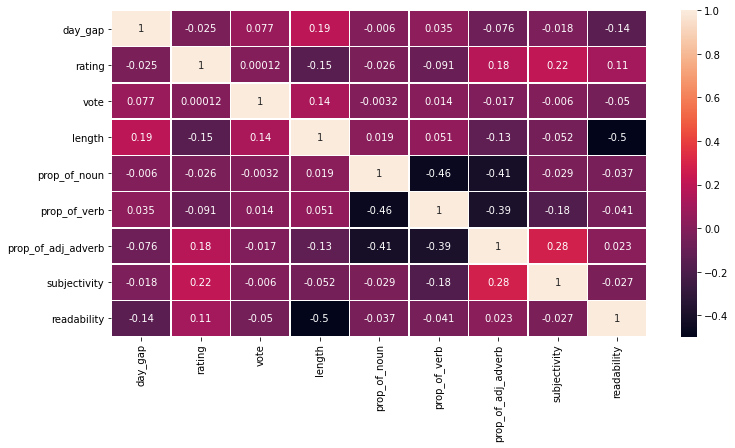

In [121]:
fig = plt.figure(figsize=(12, 6))
sns.heatmap(feature_visual.corr(), annot=True, linewidth=.5)

No strong correlation pairs existed.

In [122]:
# Trend Analysis

# Aggregate the features by year, taking mean as the aggregation method.
trend_data_by_year = feature_visual.iloc[:, 3:].groupby("year").mean().reset_index()
trend_data_by_year

,year,rating,vote,length,prop_of_noun,prop_of_verb,prop_of_adj_adverb,subjectivity,readability
0,2000,4.000000,2.000000,40.000000,0.350000,0.200000,0.350000,0.425344,40.470000
1,2001,4.000000,13.000000,56.000000,0.392857,0.160714,0.321429,0.383333,1.050220
2,2002,1.000000,2.000000,24.000000,0.416667,0.208333,0.291667,0.400000,64.715000
3,2003,3.000000,26.500000,58.500000,0.412113,0.147165,0.303866,0.314087,6.448875
4,2004,3.040000,13.720000,59.480000,0.406986,0.213359,0.260260,0.507428,32.777595
5,2005,3.593750,15.947917,98.197917,0.375813,0.219775,0.270899,0.507754,16.666521
6,2006,3.717557,23.419847,86.244275,0.379301,0.221180,0.264083,0.522968,33.334700
7,2007,3.651562,9.962500,63.739063,0.380196,0.221641,0.265007,0.497028,39.618415
8,2008,3.593519,11.159259,77.097222,0.385555,0.218360,0.264814,0.511418,34.355226
9,2009,3.653004,9.415497,62.020775,0.385848,0.221411,0.259071,0.508921,40.813718


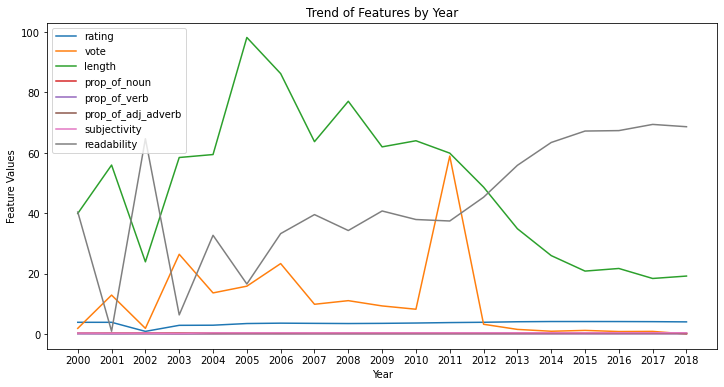

In [123]:
fig = plt.figure(figsize=(12, 6))
plt.plot(trend_data_by_year["year"], trend_data_by_year["rating"], label = "rating")
plt.plot(trend_data_by_year["year"], trend_data_by_year["vote"], label = "vote")
plt.plot(trend_data_by_year["year"], trend_data_by_year["length"], label = "length")
plt.plot(trend_data_by_year["year"], trend_data_by_year["prop_of_noun"], label = "prop_of_noun")
plt.plot(trend_data_by_year["year"], trend_data_by_year["prop_of_verb"], label = "prop_of_verb")
plt.plot(trend_data_by_year["year"], trend_data_by_year["prop_of_adj_adverb"], label = "prop_of_adj_adverb")
plt.plot(trend_data_by_year["year"], trend_data_by_year["subjectivity"], label = "subjectivity")
plt.plot(trend_data_by_year["year"], trend_data_by_year["readability"], label = "readability")
plt.xlabel("Year")
plt.ylabel("Feature Values")
plt.title("Trend of Features by Year")
plt.legend()

[Text(0, 0.5, 'Feature Values'),
 Text(0.5, 0, 'Year'),
 Text(0.5, 1.0, 'Trend of readability by year')]

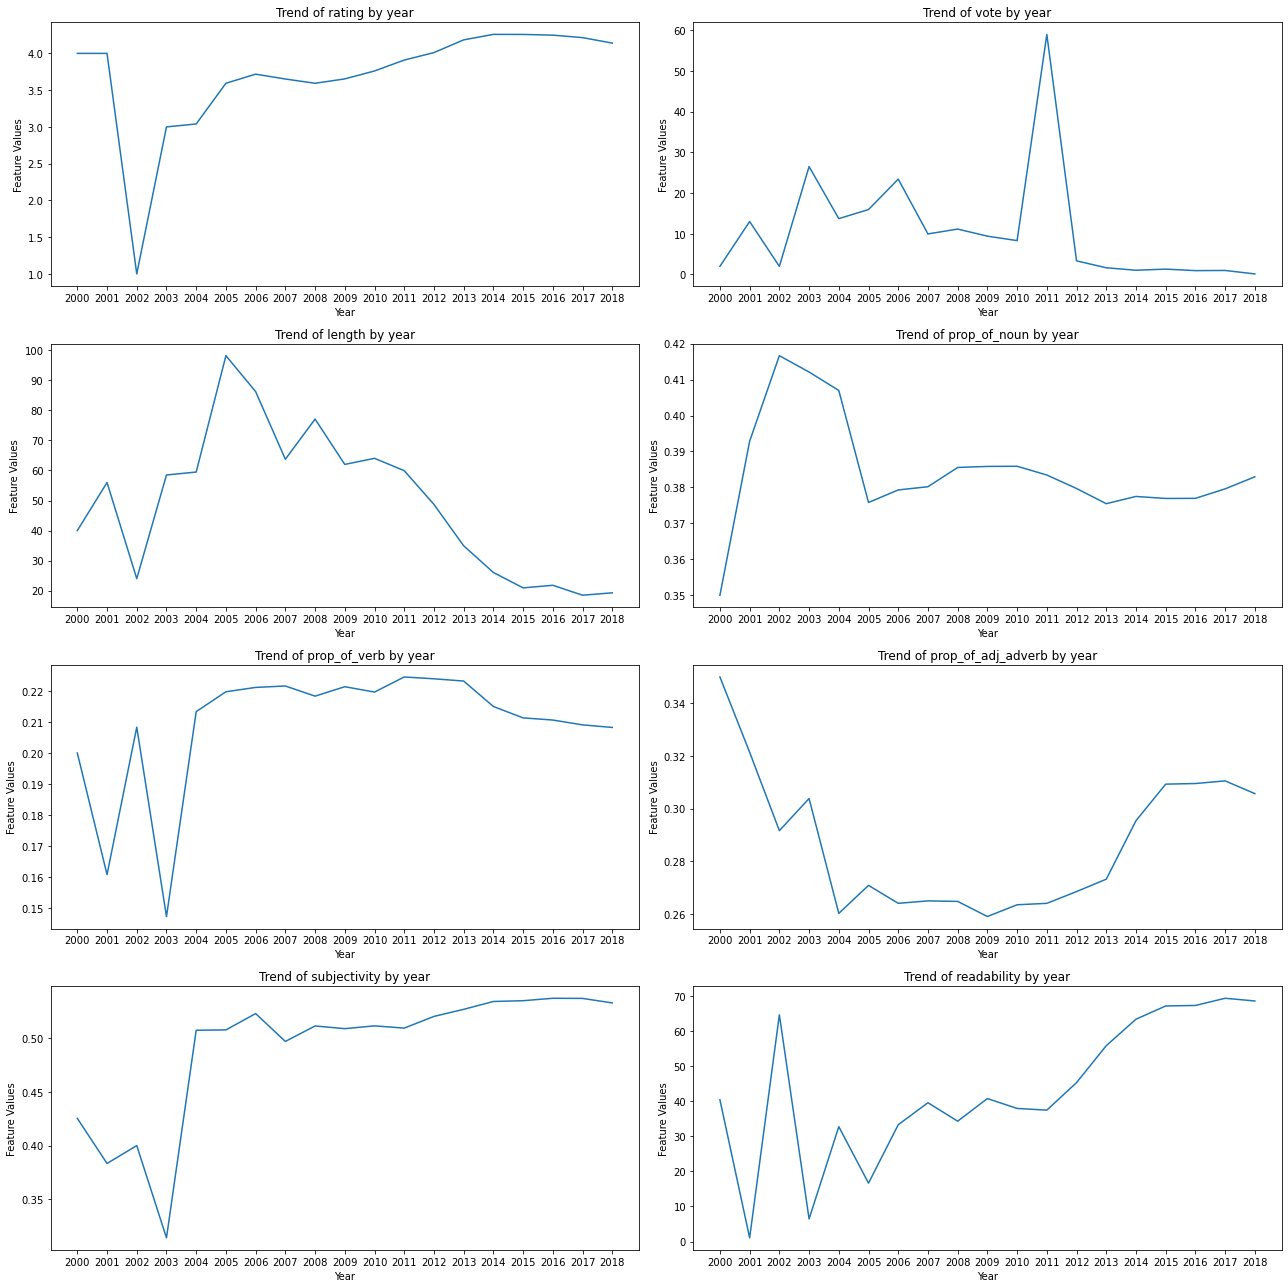

In [124]:
fig, axes = plt.subplots(nrows = 4, ncols = 2, figsize=(18, 18), tight_layout=True)
axes[0][0].plot(trend_data_by_year["year"], trend_data_by_year["rating"], label = "rating")
axes[0][0].set(title="Trend of rating by year", xlabel="Year", ylabel="Feature Values")
axes[0][1].plot(trend_data_by_year["year"], trend_data_by_year["vote"], label = "vote")
axes[0][1].set(title="Trend of vote by year", xlabel="Year", ylabel="Feature Values")
axes[1][0].plot(trend_data_by_year["year"], trend_data_by_year["length"], label = "length")
axes[1][0].set(title="Trend of length by year", xlabel="Year", ylabel="Feature Values")
axes[1][1].plot(trend_data_by_year["year"], trend_data_by_year["prop_of_noun"], label = "prop_of_noun")
axes[1][1].set(title="Trend of prop_of_noun by year", xlabel="Year", ylabel="Feature Values")
axes[2][0].plot(trend_data_by_year["year"], trend_data_by_year["prop_of_verb"], label = "prop_of_verb")
axes[2][0].set(title="Trend of prop_of_verb by year", xlabel="Year", ylabel="Feature Values")
axes[2][1].plot(trend_data_by_year["year"], trend_data_by_year["prop_of_adj_adverb"], label = "prop_of_adj_adverb")
axes[2][1].set(title="Trend of prop_of_adj_adverb by year", xlabel="Year", ylabel="Feature Values")
axes[3][0].plot(trend_data_by_year["year"], trend_data_by_year["subjectivity"], label = "subjectivity")
axes[3][0].set(title="Trend of subjectivity by year", xlabel="Year", ylabel="Feature Values")
axes[3][1].plot(trend_data_by_year["year"], trend_data_by_year["readability"], label = "readability")
axes[3][1].set(title="Trend of readability by year", xlabel="Year", ylabel="Feature Values")

From the graph, there exist a general decreasing trend in rating, vote, length. Consumers might be more sensitive to product quality and write more succinct reviews. Also, the prop_of_adj_adverb and readability observed an increasing trend. Consumers might be expressing more personal and subjective experiences. With shorter reviews on average, the readability also increased accordingly.

In [125]:
# Aggregate the features by year & month, taking mean as the aggregation method.
trend_data_by_year_month = feature_visual.iloc[:, 2:].groupby("year-month").mean().reset_index()
trend_data_by_year_month

,year-month,rating,vote,length,prop_of_noun,prop_of_verb,prop_of_adj_adverb,subjectivity,readability
0,2000-10,4.000000,2.000000,40.000000,0.350000,0.200000,0.350000,0.425344,40.470000
1,2001-11,4.000000,13.000000,56.000000,0.392857,0.160714,0.321429,0.383333,1.050220
2,2002-02,1.000000,2.000000,24.000000,0.416667,0.208333,0.291667,0.400000,64.715000
3,2003-08,4.000000,39.000000,97.000000,0.474227,0.144330,0.257732,0.372619,-68.926000
4,2003-11,2.000000,14.000000,20.000000,0.350000,0.150000,0.350000,0.255556,81.823750
...,...,...,...,...,...,...,...,...,...
174,2018-06,4.132191,0.071535,18.326975,0.384517,0.205561,0.304712,0.533586,69.252873
175,2018-07,4.131569,0.076980,19.020910,0.391456,0.206590,0.302990,0.531157,68.369407
176,2018-08,4.187674,0.051032,19.110987,0.393650,0.201120,0.299032,0.538355,66.683733
177,2018-09,4.236025,0.022084,20.508627,0.386017,0.206963,0.302293,0.539509,67.009824


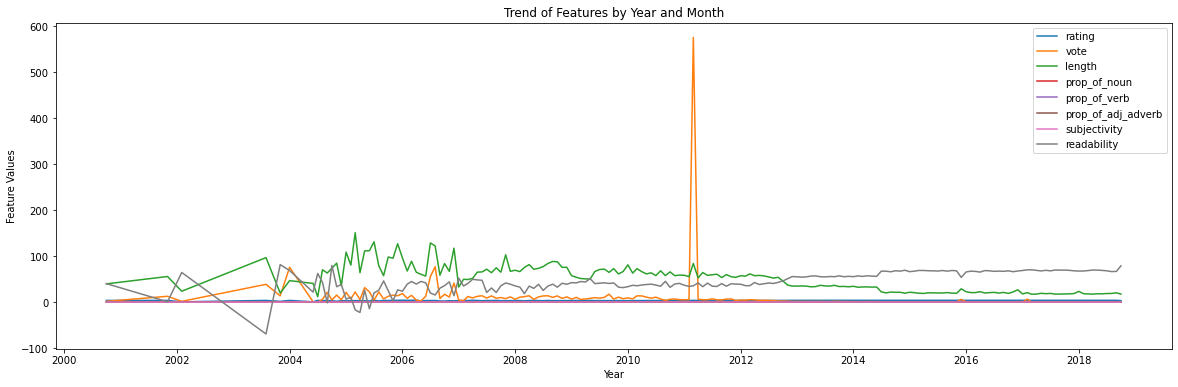

In [126]:
fig = plt.figure(figsize=(20, 6))
year_month = np.asarray(trend_data_by_year_month["year-month"], dtype='datetime64[s]')
plt.plot(year_month, trend_data_by_year_month["rating"], label = "rating")
plt.plot(year_month, trend_data_by_year_month["vote"], label = "vote")
plt.plot(year_month, trend_data_by_year_month["length"], label = "length")
plt.plot(year_month, trend_data_by_year_month["prop_of_noun"], label = "prop_of_noun")
plt.plot(year_month, trend_data_by_year_month["prop_of_verb"], label = "prop_of_verb")
plt.plot(year_month, trend_data_by_year_month["prop_of_adj_adverb"], label = "prop_of_adj_adverb")
plt.plot(year_month, trend_data_by_year_month["subjectivity"], label = "subjectivity")
plt.plot(year_month, trend_data_by_year_month["readability"], label = "readability")
plt.xlabel("Year")
plt.ylabel("Feature Values")
#plt.xticks(rotation = 90)
plt.title("Trend of Features by Year and Month")
plt.legend()

[Text(0, 0.5, 'Feature Values'),
 Text(0.5, 0, 'Year'),
 Text(0.5, 1.0, 'Trend of readability by year and month')]

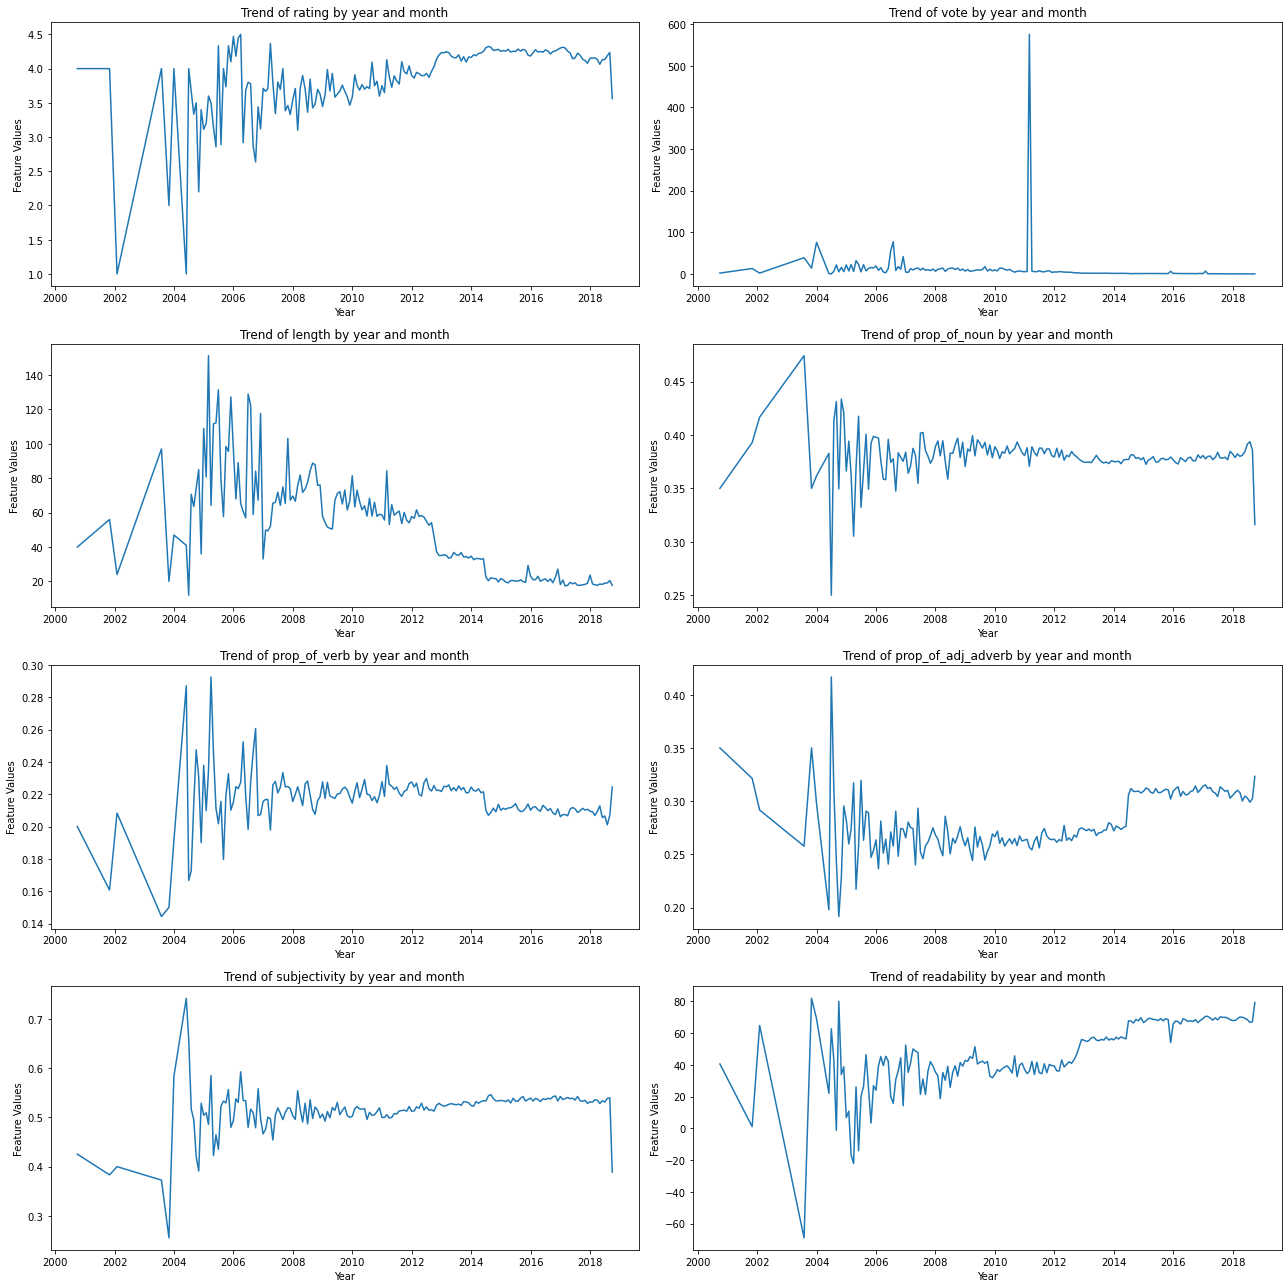

In [127]:
fig, axes = plt.subplots(nrows = 4, ncols = 2, figsize=(18, 18), tight_layout=True)
axes[0][0].plot(year_month, trend_data_by_year_month["rating"], label = "rating")
axes[0][0].set(title="Trend of rating by year and month", xlabel="Year", ylabel="Feature Values")
axes[0][1].plot(year_month, trend_data_by_year_month["vote"], label = "vote")
axes[0][1].set(title="Trend of vote by year and month", xlabel="Year", ylabel="Feature Values")
axes[1][0].plot(year_month, trend_data_by_year_month["length"], label = "length")
axes[1][0].set(title="Trend of length by year and month", xlabel="Year", ylabel="Feature Values")
axes[1][1].plot(year_month, trend_data_by_year_month["prop_of_noun"], label = "prop_of_noun")
axes[1][1].set(title="Trend of prop_of_noun by year and month", xlabel="Year", ylabel="Feature Values")
axes[2][0].plot(year_month, trend_data_by_year_month["prop_of_verb"], label = "prop_of_verb")
axes[2][0].set(title="Trend of prop_of_verb by year and month", xlabel="Year", ylabel="Feature Values")
axes[2][1].plot(year_month, trend_data_by_year_month["prop_of_adj_adverb"], label = "prop_of_adj_adverb")
axes[2][1].set(title="Trend of prop_of_adj_adverb by year and month", xlabel="Year", ylabel="Feature Values")
axes[3][0].plot(year_month, trend_data_by_year_month["subjectivity"], label = "subjectivity")
axes[3][0].set(title="Trend of subjectivity by year and month", xlabel="Year", ylabel="Feature Values")
axes[3][1].plot(year_month, trend_data_by_year_month["readability"], label = "readability")
axes[3][1].set(title="Trend of readability by year and month", xlabel="Year", ylabel="Feature Values")